In [1]:
import pickle

import numpy as np

# Data Showing

In [32]:
import os
from collections import Counter

# 指定文件夹路径

folder_path = r"C:\Users\xiaof\Desktop\Merged_Daily_Speed_Data"

# 统计每个文件的行数
line_counts = []

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # 只处理文件，忽略文件夹
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            num_lines = sum(1 for _ in f)  # 计算行数
            line_counts.append(num_lines)

# 统计不同行数的出现次数
line_count_freq = Counter(line_counts)

# 找出出现最多的行数及其占比
most_common_line_count, most_common_count = line_count_freq.most_common(1)[0]
total_files = len(line_counts)
most_common_ratio = most_common_count / total_files * 100
print(f"📊 Total number of files: {total_files}")
print(f"📈 Unique line counts and their corresponding file counts:")
for line_count, count in line_count_freq.most_common():
    print(f"  Line count: {line_count} - Number of files: {count}")

print(f"\n🔥 Most common line count: {most_common_line_count} lines")
print(f"📌 Number of files with this line count: {most_common_count}, Percentage: {most_common_ratio:.2f}%")

📊 Total number of files: 80
📈 Unique line counts and their corresponding file counts:
  Line count: 145 - Number of files: 69
  Line count: 121 - Number of files: 2
  Line count: 123 - Number of files: 2
  Line count: 115 - Number of files: 2
  Line count: 28 - Number of files: 1
  Line count: 32 - Number of files: 1
  Line count: 93 - Number of files: 1
  Line count: 34 - Number of files: 1
  Line count: 140 - Number of files: 1

🔥 Most common line count: 145 lines
📌 Number of files with this line count: 69, Percentage: 86.25%


In [31]:
import os
from collections import defaultdict

# 指定文件夹路径


# 记录行数 ≠ 146 的文件
line_count_dict = defaultdict(list)

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # 只处理文件，忽略文件夹
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            num_lines = sum(1 for _ in f)  # 计算行数
            if num_lines != 146:  # 只记录行数 ≠ 146 的文件
                line_count_dict[num_lines].append(filename)  # 记录文件名

# 输出结果
print("📊 Line Count Summary (Excluding 146) with Corresponding Files:")
for line_count, files in sorted(line_count_dict.items(), key=lambda x: x[0], reverse=True):
    print(f"  Line count: {line_count} - Number of files: {len(files)}")
    print(f"    Files: {files}\n")

📊 Line Count Summary (Excluding 146) with Corresponding Files:
  Line count: 145 - Number of files: 69
    Files: ['2022-09-28.csv', '2022-09-29.csv', '2022-09-30.csv', '2022-10-01.csv', '2022-10-02.csv', '2022-10-03.csv', '2022-10-04.csv', '2022-10-05.csv', '2022-10-06.csv', '2022-10-07.csv', '2022-10-08.csv', '2022-10-09.csv', '2022-10-10.csv', '2022-10-11.csv', '2022-10-12.csv', '2022-10-13.csv', '2022-10-14.csv', '2022-10-15.csv', '2022-10-16.csv', '2022-10-17.csv', '2022-10-18.csv', '2022-10-19.csv', '2022-10-20.csv', '2022-10-21.csv', '2022-10-22.csv', '2022-10-23.csv', '2022-10-24.csv', '2022-10-25.csv', '2022-10-26.csv', '2022-10-27.csv', '2022-12-12.csv', '2022-12-13.csv', '2022-12-14.csv', '2022-12-15.csv', '2022-12-16.csv', '2022-12-17.csv', '2022-12-18.csv', '2022-12-19.csv', '2022-12-20.csv', '2022-12-21.csv', '2022-12-22.csv', '2023-03-02.csv', '2023-03-03.csv', '2023-03-04.csv', '2023-03-05.csv', '2023-03-06.csv', '2023-03-07.csv', '2023-03-08.csv', '2023-03-09.csv', '20

In [30]:

import os
import pandas as pd

# Folder containing the CSV files
folder_path = r"C:\Users\xiaof\Desktop\Merged_Daily_Speed_Data"

# List of files with missing data
files_with_missing_data = [
    '2023-03-12.csv', '2022-12-23.csv', '2022-12-25.csv', '2022-10-28.csv', '2023-03-31.csv',
    '2022-12-26.csv', '2023-03-01.csv', '2022-12-24.csv', '2023-02-28.csv', '2022-12-11.csv', '2022-09-27.csv'
]

# Function to find missing timestamps
def find_missing_timestamps(file_path):
    try:
        # Load the CSV file
        df = pd.read_csv(file_path, parse_dates=["Datetime"])

        # Get the date from the first row
        date = df["Datetime"].dt.date.iloc[0]

        # Generate expected timestamps (every 10 minutes for 24 hours)
        expected_timestamps = pd.date_range(start=f"{date} 00:00:00", end=f"{date} 23:50:00", freq="10T")

        # Find missing timestamps
        missing_timestamps = expected_timestamps[~expected_timestamps.isin(df["Datetime"])]

        return missing_timestamps

    except Exception as e:
        return [f"Error processing {file_path}: {e}"]

# Loop through each file and find missing timestamps
for file_name in files_with_missing_data:
    file_path = os.path.join(folder_path, file_name)

    if os.path.exists(file_path):
        print(f"\n📂 Checking missing timestamps in {file_name}...")
        missing_times = find_missing_timestamps(file_path)

        if len(missing_times) > 0:
            print("❌ Missing Timestamps:")
            for timestamp in missing_times:
                print(f"   {timestamp}")
        else:
            print("✅ No missing timestamps found.")
    else:
        print(f"⚠ File not found: {file_name}")



📂 Checking missing timestamps in 2023-03-12.csv...
❌ Missing Timestamps:
   2023-03-12 02:00:00
   2023-03-12 02:10:00
   2023-03-12 02:20:00
   2023-03-12 02:30:00
   2023-03-12 02:40:00
   2023-03-12 02:50:00

📂 Checking missing timestamps in 2022-12-23.csv...
❌ Missing Timestamps:
   2022-12-23 18:20:00
   2022-12-23 18:30:00
   2022-12-23 18:40:00
   2022-12-23 20:20:00
   2022-12-23 20:30:00
   2022-12-23 20:40:00
   2022-12-23 20:50:00
   2022-12-23 21:00:00
   2022-12-23 21:10:00
   2022-12-23 21:30:00
   2022-12-23 21:50:00
   2022-12-23 22:00:00
   2022-12-23 22:10:00
   2022-12-23 22:20:00
   2022-12-23 22:30:00
   2022-12-23 22:40:00
   2022-12-23 22:50:00
   2022-12-23 23:00:00
   2022-12-23 23:20:00
   2022-12-23 23:30:00
   2022-12-23 23:40:00
   2022-12-23 23:50:00

📂 Checking missing timestamps in 2022-12-25.csv...
❌ Missing Timestamps:
   2022-12-25 00:20:00
   2022-12-25 00:40:00
   2022-12-25 00:50:00
   2022-12-25 01:00:00
   2022-12-25 01:10:00
   2022-12-25 01:20

C:\Users\xiaof\AppData\Local\Temp\ipykernel_27420\4215404952.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  expected_timestamps = pd.date_range(start=f"{date} 00:00:00", end=f"{date} 23:50:00", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_27420\4215404952.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  expected_timestamps = pd.date_range(start=f"{date} 00:00:00", end=f"{date} 23:50:00", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_27420\4215404952.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  expected_timestamps = pd.date_range(start=f"{date} 00:00:00", end=f"{date} 23:50:00", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_27420\4215404952.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  expected_timestamps = pd.d

In [18]:
import pandas as pd
import os

# 文件路径
file_22 = r"C:\Users\xiaof\Desktop\Buffalo_CSV_speed_55+\dt=2022-12-12_55.csv"
# file_23 = r"C:\Users\xiaof\Desktop\Buffalo_CSV_speed_55+\dt=2022-12-23_55.csv"


# 读取 CSV 文件
df = pd.read_csv(file_22)
# df_23 = pd.read_csv(file_23)


# 合并数据
# df = pd.concat([df_22, df_23])

# 仅保留 maxspeed_numeric == 55 的数据
df = df[df["maxspeed_numeric"] == 55]

# 生成 Datetime 字段并转换为 pandas datetime 类型
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

# 仅保留 2022-10-23 的数据
df = df[df["Datetime"].dt.date == pd.to_datetime("2022-12-11").date()]

# 按时间排序
df = df.sort_values(by="Datetime")

# 仅保留需要的列
df = df[["Datetime", "Speed"]]

# 按 10 分钟间隔计算平均速度
result = df.resample('10T', on='Datetime').mean().dropna()

# 生成输出文件路径
output_file = r"C:\Users\xiaof\Desktop\Processed_Speed_Data\2022-12-11.csv"

# 保存结果到新文件
result.to_csv(output_file, header=True, index=True)

print(f"Processed and saved: {output_file}")


Processed and saved: C:\Users\xiaof\Desktop\Processed_Speed_Data\2022-12-11.csv


C:\Users\xiaof\AppData\Local\Temp\ipykernel_27420\404322925.py:33: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  result = df.resample('10T', on='Datetime').mean().dropna()


# Preprocessing Data

In [ ]:
import os
import pandas as pd

# Directories
input_dir = r"C:\Users\xiaof\Desktop\Buffalo_CSV_speed_55+"
output_dir = r"C:\Users\xiaof\Desktop\Processed_Speed_Data"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List of dates to process
# file_list = [
#     # "2022-10-23.csv", "2022-12-22.csv", "2022-10-21.csv", "2023-03-14.csv", "2023-03-15.csv",
#     # "2022-10-24.csv", "2022-10-07.csv", "2023-03-18.csv", "2022-12-15.csv",
#     # "2022-12-14.csv", "2023-03-09.csv", "2023-03-08.csv", "2023-03-10.csv", "2022-12-21.csv",
#     # "2023-03-13.csv", "2023-03-28.csv", "2022-10-13.csv", "2022-10-04.csv", "2022-10-10.csv",
#     # "2023-03-27.csv", "2022-10-15.csv", "2023-03-12.csv", "2022-12-25.csv", "2022-12-23.csv",
#     #  "2022-10-28.csv", 
#     "2022-12-26.csv", "2022-12-24.csv",
#      "2022-09-27.csv"
# ]
file_list = ['2022-09-28.csv', '2022-09-29.csv', '2022-09-30.csv', '2022-10-01.csv', '2022-10-02.csv', '2022-10-03.csv', '2022-10-05.csv', '2022-10-06.csv', '2022-10-08.csv', '2022-10-09.csv', '2022-10-11.csv', '2022-10-12.csv', '2022-10-14.csv', '2022-10-16.csv', '2022-10-17.csv', '2022-10-18.csv', '2022-10-19.csv', '2022-10-20.csv', '2022-10-22.csv', '2022-10-25.csv', '2022-10-26.csv', '2022-10-27.csv', '2022-12-12.csv', '2022-12-13.csv', '2022-12-16.csv', '2022-12-17.csv', '2022-12-18.csv', '2022-12-19.csv', '2022-12-20.csv', '2023-03-02.csv', '2023-03-03.csv', '2023-03-04.csv', '2023-03-05.csv', '2023-03-06.csv', '2023-03-07.csv', '2023-03-11.csv', '2023-03-16.csv', '2023-03-17.csv', '2023-03-19.csv', '2023-03-20.csv', '2023-03-21.csv', '2023-03-22.csv', '2023-03-23.csv', '2023-03-24.csv', '2023-03-25.csv', '2023-03-26.csv', '2023-03-29.csv', '2023-03-30.csv']

# Loop through each date
for file_name in file_list:
    # Extract the date from the file name
    date = file_name.replace(".csv", "")
    next_date = (pd.to_datetime(date) + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
    prev_date = (pd.to_datetime(date) - pd.Timedelta(days=1)).strftime("%Y-%m-%d")
    print(f"{prev_date}")
    # File paths
    
    file_23 = os.path.join(input_dir, f"dt={date}_55.csv")
    file_22 = os.path.join(input_dir, f"dt={next_date}_55.csv")
    df_22 = pd.read_csv(file_22)
    df_23 = pd.read_csv(file_23)
    # 合并数据
    df = pd.concat([df_23, df_22])

    # 仅保留 maxspeed_numeric == 55 的数据
    df = df[df["maxspeed_numeric"] == 55]

    # 生成 Datetime 字段并转换为 pandas datetime 类型
    df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

    # Read available files
    

    # Filter for the specific date
    df = df[df["Datetime"].dt.date == pd.to_datetime(date).date()]

    # Sort by time
    df = df.sort_values(by="Datetime")

    # Keep only necessary columns
    df = df[["Datetime", "Speed"]]

    # Compute 10-minute interval average speed
    result = df.resample('10T', on='Datetime').mean().dropna()

    # Generate output file path
    output_file = os.path.join(output_dir, f"{date}.csv")

    # Save processed data
    result.to_csv(output_file, header=True, index=True)

    print(f"Processed and saved: {output_file}")


In [19]:
import os

# Define the output directory
output_dir = r"C:\Users\xiaof\Desktop\Processed_Speed_Data"

# List of files to check
file_list = [
    '2022-10-23.csv', '2022-12-22.csv', '2022-10-21.csv', '2023-03-14.csv', '2023-03-15.csv',
    '2022-10-24.csv', '2023-03-01.csv', '2022-10-07.csv', '2023-03-18.csv', '2022-12-15.csv',
    '2022-12-14.csv', '2023-03-09.csv', '2023-03-08.csv', '2023-03-10.csv', '2022-12-21.csv',
    '2023-03-13.csv', '2023-03-28.csv', '2022-10-13.csv', '2022-10-04.csv', '2022-10-10.csv',
    '2023-03-27.csv', '2022-10-15.csv', '2023-03-12.csv', '2022-12-25.csv', '2022-12-23.csv',
    '2023-03-31.csv', '2022-10-28.csv', '2022-12-26.csv', '2022-12-24.csv', '2023-02-28.csv',
    '2022-12-11.csv', '2022-09-27.csv'
]

# Dictionary to store file lengths
file_lengths = {}

# Loop through each file and check its length
for file_name in file_list:
    file_path = os.path.join(output_dir, file_name)

    # Check if the file exists
    if os.path.exists(file_path):
        with open(file_path, "r", encoding="utf-8") as f:
            num_lines = sum(1 for _ in f) - 1  # Subtract 1 to exclude the header
        file_lengths[file_name] = num_lines
    else:
        file_lengths[file_name] = "File not found"

# Print results
for file, length in file_lengths.items():
    print(f"{file}: {length} lines")


2022-10-23.csv: 144 lines
2022-12-22.csv: 144 lines
2022-10-21.csv: 144 lines
2023-03-14.csv: 144 lines
2023-03-15.csv: 144 lines
2022-10-24.csv: 144 lines
2023-03-01.csv: 114 lines
2022-10-07.csv: 144 lines
2023-03-18.csv: 144 lines
2022-12-15.csv: 144 lines
2022-12-14.csv: 144 lines
2023-03-09.csv: 144 lines
2023-03-08.csv: 144 lines
2023-03-10.csv: 144 lines
2022-12-21.csv: 144 lines
2023-03-13.csv: 144 lines
2023-03-28.csv: 144 lines
2022-10-13.csv: 144 lines
2022-10-04.csv: 144 lines
2022-10-10.csv: 144 lines
2023-03-27.csv: 144 lines
2022-10-15.csv: 144 lines
2023-03-12.csv: 139 lines
2022-12-25.csv: 122 lines
2022-12-23.csv: 122 lines
2023-03-31.csv: 120 lines
2022-10-28.csv: 120 lines
2022-12-26.csv: 114 lines
2022-12-24.csv: 92 lines
2023-02-28.csv: 33 lines
2022-12-11.csv: 31 lines
2022-09-27.csv: File not found lines


In [3]:
import pandas as pd
import os

# 文件路径
folder_path = r"C:\Users\xiaof\Desktop\Merged_Daily_Speed_Data"
files = ["2022-10-21.csv", "2023-03-14.csv", "2023-03-15.csv"]

# 读取并合并数据
df_list = []
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# 合并数据
df = pd.concat(df_list)

# 确保 Datetime 列为时间格式
df["Datetime"] = pd.to_datetime(df["Datetime"])

# 找出重复的时间
duplicates = df[df.duplicated(subset=["Datetime"], keep=False)]

# 输出重复的时间戳
if not duplicates.empty:
    print("重复的时间戳：")
    print(duplicates["Datetime"].sort_values().unique())
else:
    print("没有重复的时间戳。")


重复的时间戳：
<DatetimeArray>
['2022-10-21 19:20:00', '2022-10-21 19:30:00', '2022-10-21 19:40:00',
 '2022-10-21 19:50:00', '2023-03-14 13:50:00', '2023-03-14 14:00:00',
 '2023-03-14 14:10:00', '2023-03-14 19:50:00', '2023-03-15 17:00:00',
 '2023-03-15 17:10:00', '2023-03-15 17:20:00', '2023-03-15 19:50:00']
Length: 12, dtype: datetime64[ns]


# Weather data preprocessing

In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import os
import pandas as pd
import re

# Define directories
speed_dir = r"C:\Users\xiaof\Desktop\Merged_Daily_Speed_Data"
weather_dir = r"C:\Users\xiaof\Desktop\RWIS Data"
output_dir = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List all speed data files
speed_files = [f for f in os.listdir(speed_dir) if f.endswith(".csv")]

# List all weather data files, ignoring system-generated hidden files
weather_files = [f for f in os.listdir(weather_dir) if f.endswith(".xlsx") and not f.startswith("._")]

# Function to extract date range from weather file name
def extract_date_range(file_name):
    match = re.search(r"RWIS_(\d{2}-\d{2}-\d{4}) .* (\d{2}-\d{2}-\d{4})", file_name)
    if match:
        start_date = pd.to_datetime(match.group(1), format="%m-%d-%Y")
        end_date = pd.to_datetime(match.group(2), format="%m-%d-%Y")
        return start_date, end_date
    return None, None

# Process each speed file
for speed_file in speed_files:
    # Extract date from speed file name
    speed_date_str = speed_file.replace(".csv", "")
    speed_date = pd.to_datetime(speed_date_str, format="%Y-%m-%d")

    # Find the corresponding weather file
    matched_weather_file = None
    for weather_file in weather_files:
        start_date, end_date = extract_date_range(weather_file)
        if start_date and end_date and start_date <= speed_date <= end_date:
            matched_weather_file = weather_file
            break

    if not matched_weather_file:
        print(f"⚠ No matching weather file found for {speed_file}. Skipping...")
        continue

    # Load speed data
    speed_path = os.path.join(speed_dir, speed_file)
    speed_df = pd.read_csv(speed_path)

    # Convert speed timestamps to datetime
    speed_df["Datetime"] = pd.to_datetime(speed_df["Datetime"], errors="coerce")

    # Drop any invalid timestamps
    speed_df = speed_df.dropna(subset=["Datetime"])

    # Load weather data
    weather_path = os.path.join(weather_dir, matched_weather_file)
    
    if os.path.exists(weather_path):
        try:
            # Read Excel file with correct engine
            weather_df = pd.read_excel(weather_path, skiprows=3, engine="openpyxl")
            
            # Rename first row as headers and reset index
            weather_df.columns = weather_df.iloc[0]
            weather_df = weather_df[1:].reset_index(drop=True)

            # Rename timestamp column
            weather_df.rename(columns={weather_df.columns[0]: "Datetime"}, inplace=True)

            # Convert weather timestamps to datetime
            weather_df["Datetime"] = pd.to_datetime(weather_df["Datetime"], errors="coerce")

            # Drop rows with invalid timestamps
            weather_df = weather_df.dropna(subset=["Datetime"])

        except Exception as e:
            print(f"❌ Error reading {weather_path}: {e}")
            continue
    else:
        print(f"⚠ Weather file not found: {weather_path}. Skipping...")
        continue

    # Merge speed and weather data on Datetime (inner join to keep common timestamps)
    merged_df = pd.merge(speed_df, weather_df, on="Datetime", how="inner")

    # Save merged data
    output_path = os.path.join(output_dir, speed_file)
    merged_df.to_csv(output_path, index=False)

    print(f"✅ Merged and saved: {output_path}")


⚠ No matching weather file found for 2022-09-27.csv. Skipping...
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-09-28.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-09-29.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-09-30.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-01.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-02.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-03.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-04.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-05.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-06.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-07.csv
✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-10-08.csv
✅ Merged an

c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-11.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-12.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-13.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-14.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-15.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-16.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-17.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-18.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-19.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-20.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-21.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-22.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-23.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-24.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-25.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2022-12-26.csv
⚠ No matching weather file found for 2023-02-28.csv. Skipping...


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-01.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-02.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-03.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-04.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-05.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-06.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-07.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-08.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-09.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-10.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-11.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-12.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-13.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-14.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-15.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-16.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-17.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-18.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-19.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-20.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-21.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-22.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-23.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-24.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-25.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-26.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-27.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-28.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-29.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-30.csv


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Merged and saved: C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data\2023-03-31.csv


In [ ]:
r"C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data"

In [13]:
import os
from collections import Counter

# 指定文件夹路径

folder_path = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data"

# 统计每个文件的行数
line_counts = []

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # 只处理文件，忽略文件夹
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            num_lines = sum(1 for _ in f)  # 计算行数
            line_counts.append(num_lines)

# 统计不同行数的出现次数
line_count_freq = Counter(line_counts)

# 找出出现最多的行数及其占比
most_common_line_count, most_common_count = line_count_freq.most_common(1)[0]
total_files = len(line_counts)
most_common_ratio = most_common_count / total_files * 100
print(f"📊 Total number of files: {total_files}")
print(f"📈 Unique line counts and their corresponding file counts:")
for line_count, count in line_count_freq.most_common():
    print(f"  Line count: {line_count} - Number of files: {count}")

print(f"\n🔥 Most common line count: {most_common_line_count} lines")
print(f"📌 Number of files with this line count: {most_common_count}, Percentage: {most_common_ratio:.2f}%")

📊 Total number of files: 78
📈 Unique line counts and their corresponding file counts:
  Line count: 169 - Number of files: 65
  Line count: 168 - Number of files: 2
  Line count: 167 - Number of files: 2
  Line count: 145 - Number of files: 2
  Line count: 147 - Number of files: 2
  Line count: 139 - Number of files: 2
  Line count: 56 - Number of files: 1
  Line count: 117 - Number of files: 1
  Line count: 164 - Number of files: 1

🔥 Most common line count: 169 lines
📌 Number of files with this line count: 65, Percentage: 83.33%


In [14]:
import os
import pandas as pd

# Define input and output directories
input_dir = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data"
output_dir = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data_Corrected"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List all CSV files
files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# Define correct header
correct_header = [
    "Datetime", "Speed", "Surface Temperature (°C) Surface site 1",
    "Surface State Surface site 1", "Air Temperature (°C) Atmospheric site",
    "Dew Point Temperature (°C) Atmospheric site", "Level of grip Surface site 1",
    "Water Layer (mm) Surface site 1", "Ice Layer (mm) Surface site 1",
    "Snow Layer (water equivalent) (mm) Surface site 1", "Relative Humidity (%) Atmospheric site",
    "Rain State Atmospheric site", "Rain Intensity (mm/h) Atmospheric site",
    "Wind Speed (m/s) Atmospheric site", "Wind Direction (°) Atmospheric site",
    "Visibility (m) Atmospheric site", "Precipitation, Rolling Average (past 1 hour) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 3 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 6 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 12 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 24 hours) (mm) Atmospheric site",
    "Alarm Status Surface site 1", "Rain on/off Atmospheric site",
    "Wind Direction, near instantaneous value (Spot Direction) (°) Atmospheric site",
    "Wind Speed, near-instantaneous value (Spot Speed) (m/s) Atmospheric site",
    "Max Wind Speed (m/s) Atmospheric site"
]

# Process each file
for file in files:
    file_path = os.path.join(input_dir, file)
    output_path = os.path.join(output_dir, file)

    # Load file without dropping any rows
    df = pd.read_csv(file_path)

    # Assign correct headers (assuming the original headers are incorrect)
    df.columns = correct_header

    # Save the corrected file
    df.to_csv(output_path, index=False)

    print(f"✅ Processed: {file}")




✅ Processed: 2022-09-28.csv
✅ Processed: 2022-09-29.csv
✅ Processed: 2022-09-30.csv
✅ Processed: 2022-10-01.csv
✅ Processed: 2022-10-02.csv
✅ Processed: 2022-10-03.csv
✅ Processed: 2022-10-04.csv
✅ Processed: 2022-10-05.csv
✅ Processed: 2022-10-06.csv
✅ Processed: 2022-10-07.csv
✅ Processed: 2022-10-08.csv
✅ Processed: 2022-10-09.csv
✅ Processed: 2022-10-10.csv
✅ Processed: 2022-10-11.csv
✅ Processed: 2022-10-12.csv
✅ Processed: 2022-10-13.csv
✅ Processed: 2022-10-14.csv
✅ Processed: 2022-10-15.csv
✅ Processed: 2022-10-16.csv
✅ Processed: 2022-10-17.csv
✅ Processed: 2022-10-18.csv
✅ Processed: 2022-10-19.csv
✅ Processed: 2022-10-20.csv
✅ Processed: 2022-10-21.csv
✅ Processed: 2022-10-22.csv
✅ Processed: 2022-10-23.csv
✅ Processed: 2022-10-24.csv
✅ Processed: 2022-10-25.csv
✅ Processed: 2022-10-26.csv
✅ Processed: 2022-10-27.csv
✅ Processed: 2022-10-28.csv
✅ Processed: 2022-12-11.csv
✅ Processed: 2022-12-12.csv
✅ Processed: 2022-12-13.csv
✅ Processed: 2022-12-14.csv
✅ Processed: 2022-12

In [16]:
# Define correct header
correct_header = [
    "Datetime", "Speed", "Surface Temperature (°C) Surface site 1",
    "Surface State Surface site 1", "Air Temperature (°C) Atmospheric site",
    "Dew Point Temperature (°C) Atmospheric site", "Level of grip Surface site 1",
    "Water Layer (mm) Surface site 1", "Ice Layer (mm) Surface site 1",
    "Snow Layer (water equivalent) (mm) Surface site 1", "Relative Humidity (%) Atmospheric site",
    "Rain State Atmospheric site", "Rain Intensity (mm/h) Atmospheric site",
    "Wind Speed (m/s) Atmospheric site", "Wind Direction (°) Atmospheric site",
    "Visibility (m) Atmospheric site", "Precipitation, Rolling Average (past 1 hour) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 3 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 6 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 12 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 24 hours) (mm) Atmospheric site",
    "Alarm Status Surface site 1", "Rain on/off Atmospheric site",
    "Wind Direction, near instantaneous value (Spot Direction) (°) Atmospheric site",
    "Wind Speed, near-instantaneous value (Spot Speed) (m/s) Atmospheric site",
    "Max Wind Speed (m/s) Atmospheric site"
]
print(len(correct_header))

26


In [15]:
import os
from collections import Counter

# 指定文件夹路径

folder_path = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data_Corrected"

# 统计每个文件的行数
line_counts = []

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # 只处理文件，忽略文件夹
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            num_lines = sum(1 for _ in f)  # 计算行数
            line_counts.append(num_lines)

# 统计不同行数的出现次数
line_count_freq = Counter(line_counts)

# 找出出现最多的行数及其占比
most_common_line_count, most_common_count = line_count_freq.most_common(1)[0]
total_files = len(line_counts)
most_common_ratio = most_common_count / total_files * 100
print(f"📊 Total number of files: {total_files}")
print(f"📈 Unique line counts and their corresponding file counts:")
for line_count, count in line_count_freq.most_common():
    print(f"  Line count: {line_count} - Number of files: {count}")

print(f"\n🔥 Most common line count: {most_common_line_count} lines")
print(f"📌 Number of files with this line count: {most_common_count}, Percentage: {most_common_ratio:.2f}%")

📊 Total number of files: 78
📈 Unique line counts and their corresponding file counts:
  Line count: 145 - Number of files: 65
  Line count: 144 - Number of files: 2
  Line count: 143 - Number of files: 2
  Line count: 121 - Number of files: 2
  Line count: 123 - Number of files: 2
  Line count: 115 - Number of files: 2
  Line count: 32 - Number of files: 1
  Line count: 93 - Number of files: 1
  Line count: 140 - Number of files: 1

🔥 Most common line count: 145 lines
📌 Number of files with this line count: 65, Percentage: 83.33%


In [2]:
import os
from collections import Counter

# 指定文件夹路径
folder_path = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed_Data_Corrected"

# 统计每个文件的行数
line_counts = {}
file_dates = {}

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    # 只处理文件，忽略文件夹
    if os.path.isfile(file_path) and filename.endswith(".csv"):
        with open(file_path, 'r', encoding='utf-8') as f:
            num_lines = sum(1 for _ in f)  # 计算行数
            line_counts[filename] = num_lines
            file_dates[filename] = filename.replace(".csv", "")  # 提取日期

# 统计不同行数的出现次数
line_count_freq = Counter(line_counts.values())

# 找出出现最多的行数及其占比
most_common_line_count, most_common_count = line_count_freq.most_common(1)[0]
total_files = len(line_counts)
most_common_ratio = most_common_count / total_files * 100

print(f"📊 Total number of files: {total_files}")
print(f"📈 Unique line counts and their corresponding file counts:")
for line_count, count in line_count_freq.most_common():
    print(f"  Line count: {line_count} - Number of files: {count}")

print(f"\n🔥 Most common line count: {most_common_line_count} lines")
print(f"📌 Number of files with this line count: {most_common_count}, Percentage: {most_common_ratio:.2f}%")

# **查找行数不足的文件**
print("\n⚠ 以下文件的行数少于最常见行数：")
for filename, line_count in line_counts.items():
    if line_count < most_common_line_count:
        print(f"  {file_dates[filename]} - {line_count} 行")


📊 Total number of files: 78
📈 Unique line counts and their corresponding file counts:
  Line count: 145 - Number of files: 65
  Line count: 144 - Number of files: 2
  Line count: 143 - Number of files: 2
  Line count: 121 - Number of files: 2
  Line count: 123 - Number of files: 2
  Line count: 115 - Number of files: 2
  Line count: 32 - Number of files: 1
  Line count: 93 - Number of files: 1
  Line count: 140 - Number of files: 1

🔥 Most common line count: 145 lines
📌 Number of files with this line count: 65, Percentage: 83.33%

⚠ 以下文件的行数少于最常见行数：
  2022-10-12 - 144 行
  2022-10-20 - 143 行
  2022-10-27 - 144 行
  2022-10-28 - 121 行
  2022-12-11 - 32 行
  2022-12-23 - 123 行
  2022-12-24 - 93 行
  2022-12-25 - 123 行
  2022-12-26 - 115 行
  2023-03-01 - 115 行
  2023-03-12 - 140 行
  2023-03-26 - 143 行
  2023-03-31 - 121 行


In [1]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Re-load the Excel file after execution state reset
import pandas as pd

file_path = r"C:\Users\xiaof\Desktop\RWIS Data/RWIS_03-01-2023 00-00 - 04-01-2023 00-00.xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = xls.parse(sheet_name='Observations for Service Cente')

# Convert the first row containing column names into actual column names
df.columns = df.iloc[3]  # Set column names
df = df[4:].reset_index(drop=True)  # Remove the first few rows and reset index

# Rename the timestamp column
df = df.rename(columns={df.columns[0]: "Datetime"})

# Convert the "Datetime" column to just time (HH:MM format)
df["Time"] = pd.to_datetime(df["Datetime"], errors='coerce').dt.strftime('%H:%M')

# Drop the original Datetime column
df = df.drop(columns=["Datetime"])

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Find unique values and their counts for non-numeric columns
non_numeric_values_counts = {col: df[col].value_counts().to_dict() for col in non_numeric_columns}

# Print non-numeric features and their unique values count
print("Non-numeric features and their unique value counts:")
for col, counts in non_numeric_values_counts.items():
    print(f"\nFeature: {col}")
    for key, value in counts.items():
        print(f"  {key}: {value}")

# Create mapping for non-numeric columns and normalize values from 0 to 1
mappings = {}
df_encoded = df.copy()

for col, counts in non_numeric_values_counts.items():
    unique_vals = list(counts.keys())
    mapping = {val: i / (len(unique_vals) - 1) if len(unique_vals) > 1 else 0 for i, val in enumerate(unique_vals)}
    mappings[col] = mapping
    df_encoded[col] = df_encoded[col].map(mapping).fillna(df_encoded[col])

# Display the transformed dataframe
# Display the transformed dataframe

# For local environment
import pandas as pd
from IPython.display import display

display(df_encoded)

# Return the mappings for reference
mappings


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Non-numeric features and their unique value counts:

Feature: Surface Temperature (°C) 
Surface site 1
  0: 68
  0.2: 63
  2.7: 61
  0.1: 58
  1.1: 57
  2.5: 56
  2.4: 53
  1.2: 53
  2.8: 53
  -1.8: 51
  0.9: 51
  1: 49
  0.6: 48
  1.7: 47
  0.3: 46
  -0.1: 45
  1.6: 45
  0.8: 44
  1.8: 43
  2.2: 42
  0.7: 42
  0.4: 41
  2.6: 41
  1.3: 41
  3.7: 39
  1.5: 38
  2.1: 37
  -0.4: 36
  2: 36
  -1: 36
  4.2: 35
  5.8: 35
  6.1: 35
  2.9: 35
  1.9: 35
  -1.5: 35
  0.5: 35
  -1.9: 35
  5: 34
  -0.2: 34
  4.3: 34
  1.4: 33
  -2.1: 32
  3.8: 32
  4.4: 32
  2.3: 32
  -2: 32
  -1.7: 31
  3.9: 31
  8.3: 31
  -0.7: 31
  3: 31
  4.7: 30
  5.4: 29
  6: 28
  4.8: 28
  3.5: 28
  3.3: 27
  3.2: 27
  4.1: 27
  4: 27
  9.2: 27
  6.3: 27
  3.1: 26
  6.5: 26
  -0.8: 26
  -0.9: 26
  8.5: 26
  -2.7: 25
  3.6: 25
  6.4: 25
  -1.6: 25
  8.2: 25
  8.8: 23
  7.7: 23
  -0.3: 23
  6.2: 23
  5.2: 23
  7.5: 23
  3.4: 23
  5.7: 23
  -0.5: 22
  5.9: 22
  -2.6: 22
  -1.4: 22
  -2.4: 21
  6.8: 21
  4.9: 21
  -2.3: 21
  9.

3     Surface Temperature (°C) \nSurface site 1  \
0                                      0.372093   
1                                      0.341085   
2                                      0.372093   
3                                      0.341085   
4                                      0.329457   
...                                         ...   
4452                                   0.236434   
4453                                   0.236434   
4454                                   0.399225   
4455                                   0.410853   
4456                                   0.344961   

3     Surface State \nSurface site 1  Air Temperature (°C) \nAtmospheric site  \
0                                0.2                                 0.286486   
1                                0.2                                 0.308108   
2                                0.2                                 0.210811   
3                                0.2                                 0.113514   
4                                0.2                                 0.232432   
...                              ...                                      ...   
4452                             0.2                                 0.632432   
4453                             0.2                                 0.827027   
4454                             0.2                                 0.827027   
4455                             0.2                                 0.875676   
4456                             0.2                                 0.956757   

3     Dew Point Temperature (°C) \nAtmospheric site  \
0                                          0.288703   
1                                          0.138075   
2                                          0.234310   
3                                          0.138075   
4                                          0.234310   
...                                             ...   
4452                                       0.602510   
4453                                       0.610879   
4454                                       0.610879   
4455                                       0.602510   
4456                                       0.602510   

3     Level of grip \nSurface site 1  Water Layer (mm) \nSurface site 1  \
0                           0.037037                           0.054264   
1                           0.037037                           0.054264   
2                           0.037037                           0.054264   
3                           0.037037                           0.054264   
4                           0.037037                           0.054264   
...                              ...                                ...   
4452                        0.074074                           0.139535   
4453                        0.074074                           0.139535   
4454                        0.074074                           0.178295   
4455                        0.129630                           0.178295   
4456                        0.129630                           0.108527   

3     Ice Layer (mm) \nSurface site 1  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   
...                               ...   
4452                              0.0   
4453                              0.0   
4454                              0.0   
4455                              0.0   
4456                              0.0   

3     Snow Layer (water equivalent) (mm) \nSurface site 1  \
0                                                   0.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0     
4                                                   0.

{'Surface Temperature (°C) \nSurface site 1': {0: 0.0,
  0.2: 0.003875968992248062,
  2.7: 0.007751937984496124,
  0.1: 0.011627906976744186,
  1.1: 0.015503875968992248,
  2.5: 0.01937984496124031,
  2.4: 0.023255813953488372,
  1.2: 0.027131782945736434,
  2.8: 0.031007751937984496,
  -1.8: 0.03488372093023256,
  0.9: 0.03875968992248062,
  1: 0.04263565891472868,
  0.6: 0.046511627906976744,
  1.7: 0.050387596899224806,
  0.3: 0.05426356589147287,
  -0.1: 0.05813953488372093,
  1.6: 0.06201550387596899,
  0.8: 0.06589147286821706,
  1.8: 0.06976744186046512,
  2.2: 0.07364341085271318,
  0.7: 0.07751937984496124,
  0.4: 0.08139534883720931,
  2.6: 0.08527131782945736,
  1.3: 0.08914728682170543,
  3.7: 0.09302325581395349,
  1.5: 0.09689922480620156,
  2.1: 0.10077519379844961,
  -0.4: 0.10465116279069768,
  2: 0.10852713178294573,
  -1: 0.1124031007751938,
  4.2: 0.11627906976744186,
  5.8: 0.12015503875968993,
  6.1: 0.12403100775193798,
  2.9: 0.12790697674418605,
  1.9: 0.131782

In [5]:
import os
import pandas as pd
from datetime import datetime

# 设置数据文件夹路径
folder_path = r"C:\Users\xiaof\Desktop\CSDI\CSDI\data\speed_data"

# 遍历文件夹中的所有 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        # 读取 CSV 文件
        df = pd.read_csv(file_path)

        # 假设第一列是日期列，转换为时间格式（去掉日期部分）
        df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.time

        # 保存修改后的文件（覆盖原文件）
        df.to_csv(file_path, index=False)
        print(f"已处理: {filename}")

print("所有文件处理完成！")


已处理: 2022-09-28.csv
已处理: 2022-09-29.csv
已处理: 2022-09-30.csv
已处理: 2022-10-01.csv
已处理: 2022-10-02.csv
已处理: 2022-10-03.csv
已处理: 2022-10-04.csv
已处理: 2022-10-05.csv
已处理: 2022-10-06.csv
已处理: 2022-10-07.csv
已处理: 2022-10-08.csv
已处理: 2022-10-09.csv
已处理: 2022-10-10.csv
已处理: 2022-10-11.csv
已处理: 2022-10-12.csv
已处理: 2022-10-13.csv
已处理: 2022-10-14.csv
已处理: 2022-10-15.csv
已处理: 2022-10-16.csv
已处理: 2022-10-17.csv
已处理: 2022-10-18.csv
已处理: 2022-10-19.csv
已处理: 2022-10-20.csv
已处理: 2022-10-21.csv
已处理: 2022-10-22.csv
已处理: 2022-10-23.csv
已处理: 2022-10-24.csv
已处理: 2022-10-25.csv
已处理: 2022-10-26.csv
已处理: 2022-10-27.csv
已处理: 2022-10-28.csv
已处理: 2022-12-11.csv
已处理: 2022-12-12.csv
已处理: 2022-12-13.csv
已处理: 2022-12-14.csv
已处理: 2022-12-15.csv
已处理: 2022-12-16.csv
已处理: 2022-12-17.csv
已处理: 2022-12-18.csv
已处理: 2022-12-19.csv
已处理: 2022-12-20.csv
已处理: 2022-12-21.csv
已处理: 2022-12-22.csv
已处理: 2022-12-23.csv
已处理: 2022-12-24.csv
已处理: 2022-12-25.csv
已处理: 2022-12-26.csv
已处理: 2023-03-01.csv
已处理: 2023-03-02.csv
已处理: 2023-03-03.csv


In [4]:
import os
import pandas as pd

# 输入和输出文件夹
weather_dir = r"C:\Users\xiaof\Desktop\RWIS Data"
output_dir = r"C:\Users\xiaof\Desktop\Processed_Weather_Data"
os.makedirs(output_dir, exist_ok=True)

# **正确的表头**
correct_header = [
    "Datetime", "Speed", "Surface Temperature (°C) Surface site 1",
    "Surface State Surface site 1", "Air Temperature (°C) Atmospheric site",
    "Dew Point Temperature (°C) Atmospheric site", "Level of grip Surface site 1",
    "Water Layer (mm) Surface site 1", "Ice Layer (mm) Surface site 1",
    "Snow Layer (water equivalent) (mm) Surface site 1", "Relative Humidity (%) Atmospheric site",
    "Rain State Atmospheric site", "Rain Intensity (mm/h) Atmospheric site",
    "Wind Speed (m/s) Atmospheric site", "Wind Direction (°) Atmospheric site",
    "Visibility (m) Atmospheric site", "Precipitation, Rolling Average (past 1 hour) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 3 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 6 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 12 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 24 hours) (mm) Atmospheric site",
    "Alarm Status Surface site 1", "Rain on/off Atmospheric site",
    "Wind Direction, near instantaneous value (Spot Direction) (°) Atmospheric site",
    "Wind Speed, near-instantaneous value (Spot Speed) (m/s) Atmospheric site",
    "Max Wind Speed (m/s) Atmospheric site"
]

# 读取 RWIS 目录中的所有 Excel 文件
weather_files = [f for f in os.listdir(weather_dir) if f.endswith(".xlsx") and not f.startswith("._")]

for weather_file in weather_files:
    weather_path = os.path.join(weather_dir, weather_file)

    try:
        # 读取 Excel 文件，跳过前3行
        weather_df = pd.read_excel(weather_path, skiprows=3, engine="openpyxl")

        # 修正列名
        weather_df.columns = weather_df.iloc[0]  # 第一行作为表头
        weather_df = weather_df[1:].reset_index(drop=True)

        # 统一时间列名
        weather_df.rename(columns={weather_df.columns[0]: "Datetime"}, inplace=True)

        # 确保 `Datetime` 列是 datetime 格式
        weather_df["Datetime"] = pd.to_datetime(weather_df["Datetime"], errors="coerce")

        # 删除无效时间
        weather_df = weather_df.dropna(subset=["Datetime"])

        # **按天拆分数据**
        for date, group in weather_df.groupby(weather_df["Datetime"].dt.date):
            # 按时间排序
            group = group.sort_values(by="Datetime")

            # **添加 `Speed` 列（空值）**
            group.insert(1, "Speed", "")

            # **重新排列列顺序，确保与 `correct_header` 匹配**
            group = group.reindex(columns=correct_header)

            # **第一行改为日期**
            first_row = pd.DataFrame([[date] + [""] * (len(correct_header) - 1)], columns=correct_header)

            # **组合第一行和数据**
            final_df = pd.concat([first_row, group], ignore_index=True)

            # **保存 CSV**
            output_file = os.path.join(output_dir, f"{date}.csv")
            final_df.to_csv(output_file, index=False)
            print(f"✅ 处理完成：{output_file}")

    except Exception as e:
        print(f"❌ 读取 {weather_file} 失败: {e}")

print("\n🎯 所有天气数据已转换并格式化！")


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-02-28.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-01.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-02.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-03.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-04.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-05.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-06.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-07.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-08.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-09.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-10.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-11.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-12.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-13.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_

c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-01.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-02.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-03.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-04.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-05.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-06.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-07.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-08.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-09.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-10.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-11.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-12.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-13.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-14.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_

c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-11.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-12.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-13.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-14.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-15.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-16.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-17.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-18.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-19.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-20.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-21.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-22.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-23.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-12-24.csv
✅ 处理完成：C:\Users\xiaof\Desktop\Processed_Weather_

In [12]:
import os
import pandas as pd

# 输入文件夹（RWIS 数据）
weather_dir = r"C:\Users\xiaof\Desktop\RWIS Data"

# 输出文件夹（转换后的数据）
output_dir = r"C:\Users\xiaof\Desktop\Processed_Weather_Data"
os.makedirs(output_dir, exist_ok=True)

# 读取 RWIS 文件夹中的所有 Excel 文件
weather_files = [f for f in os.listdir(weather_dir) if f.endswith(".xlsx") and not f.startswith("._")]

# 处理每个天气数据文件
for weather_file in weather_files:
    weather_path = os.path.join(weather_dir, weather_file)

    try:
        # 读取 Excel 文件（跳过前3行）
        weather_df = pd.read_excel(weather_path, skiprows=3, engine="openpyxl")

        # 修正列名
        weather_df.columns = weather_df.iloc[0]
        weather_df = weather_df[1:].reset_index(drop=True)

        # 统一时间列名
        weather_df.rename(columns={weather_df.columns[0]: "Datetime"}, inplace=True)

        # 转换时间格式
        weather_df["Datetime"] = pd.to_datetime(weather_df["Datetime"], errors="coerce")

        # 删除无效时间
        weather_df = weather_df.dropna(subset=["Datetime"])

        # 按天拆分数据
        for date, group in weather_df.groupby(weather_df["Datetime"].dt.date):
            # 生成完整的时间戳序列（144 行）
            full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")

            # 设置索引为时间
            group = group.set_index("Datetime")

            # 补齐缺失时间点，保留原数据
            group = group.reindex(full_times)

            # 插入空 Speed 列
            group.insert(0, "Speed", "")

            # 重置索引并重命名回 "Datetime"
            group = group.reset_index().rename(columns={"index": "Datetime"})

            # 输出文件名
            output_file = os.path.join(output_dir, f"{date}.csv")

            # 保存 CSV
            group.to_csv(output_file, index=False)
            print(f"✅ 补齐完成：{output_file}（共 {len(group)} 行）")

    except Exception as e:
        print(f"❌ 读取 {weather_file} 失败: {e}")

print("\n🎯 所有天气数据已标准化为 144 行/天！")


c:\Users\xiaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", fre

✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-02-28.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-01.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-02.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-03.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-04.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-05.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-06.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-07.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-08.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-09.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-10.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-11.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-03-12.csv（共 144 行）

C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq

✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-01.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-02.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-03.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-04.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-05.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-06.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-07.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-08.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-09.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-10.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-11.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-12.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2023-03-13.csv（共 144 行）

C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq

✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-09-28.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-09-29.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-09-30.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-01.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-02.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-03.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-04.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-05.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-06.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-07.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-08.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-09.csv（共 144 行）
✅ 补齐完成：C:\Users\xiaof\Desktop\Processed_Weather_Data\2022-10-10.csv（共 144 行）

C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq="10T")
C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\610542069.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_times = pd.date_range(start=f"{date} 00:00", end=f"{date} 23:50", freq

In [13]:
import os
import pandas as pd

# Define input and output directories
input_dir = r"C:\Users\xiaof\Desktop\Processed_Weather_Data"
output_dir = r"C:\Users\xiaof\Desktop\Weather_Speed_Data_Corrected"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List all CSV files
files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# Define correct header
correct_header = [
    "Datetime", "Speed", "Surface Temperature (°C) Surface site 1",
    "Surface State Surface site 1", "Air Temperature (°C) Atmospheric site",
    "Dew Point Temperature (°C) Atmospheric site", "Level of grip Surface site 1",
    "Water Layer (mm) Surface site 1", "Ice Layer (mm) Surface site 1",
    "Snow Layer (water equivalent) (mm) Surface site 1", "Relative Humidity (%) Atmospheric site",
    "Rain State Atmospheric site", "Rain Intensity (mm/h) Atmospheric site",
    "Wind Speed (m/s) Atmospheric site", "Wind Direction (°) Atmospheric site",
    "Visibility (m) Atmospheric site", "Precipitation, Rolling Average (past 1 hour) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 3 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 6 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 12 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 24 hours) (mm) Atmospheric site",
    "Alarm Status Surface site 1", "Rain on/off Atmospheric site",
    "Wind Direction, near instantaneous value (Spot Direction) (°) Atmospheric site",
    "Wind Speed, near-instantaneous value (Spot Speed) (m/s) Atmospheric site",
    "Max Wind Speed (m/s) Atmospheric site"
]

# Process each file
for file in files:
    file_path = os.path.join(input_dir, file)
    output_path = os.path.join(output_dir, file)

    # Load file without dropping any rows
    df = pd.read_csv(file_path)

    # Assign correct headers (assuming the original headers are incorrect)
    df.columns = correct_header

    # Save the corrected file
    df.to_csv(output_path, index=False)

    print(f"✅ Processed: {file}")

✅ Processed: 2022-02-28.csv
✅ Processed: 2022-03-01.csv
✅ Processed: 2022-03-02.csv
✅ Processed: 2022-03-03.csv
✅ Processed: 2022-03-04.csv
✅ Processed: 2022-03-05.csv
✅ Processed: 2022-03-06.csv
✅ Processed: 2022-03-07.csv
✅ Processed: 2022-03-08.csv
✅ Processed: 2022-03-09.csv
✅ Processed: 2022-03-10.csv
✅ Processed: 2022-03-11.csv
✅ Processed: 2022-03-12.csv
✅ Processed: 2022-03-13.csv
✅ Processed: 2022-03-14.csv
✅ Processed: 2022-03-15.csv
✅ Processed: 2022-03-16.csv
✅ Processed: 2022-03-17.csv
✅ Processed: 2022-03-18.csv
✅ Processed: 2022-03-19.csv
✅ Processed: 2022-03-20.csv
✅ Processed: 2022-03-21.csv
✅ Processed: 2022-03-22.csv
✅ Processed: 2022-03-23.csv
✅ Processed: 2022-03-24.csv
✅ Processed: 2022-03-25.csv
✅ Processed: 2022-03-26.csv
✅ Processed: 2022-03-27.csv
✅ Processed: 2022-03-28.csv
✅ Processed: 2022-09-28.csv
✅ Processed: 2022-09-29.csv
✅ Processed: 2022-09-30.csv
✅ Processed: 2022-10-01.csv
✅ Processed: 2022-10-02.csv
✅ Processed: 2022-10-03.csv
✅ Processed: 2022-10

In [15]:
import os
import pandas as pd
from datetime import datetime

# 设置数据文件夹路径
folder_path = r"C:\Users\xiaof\Desktop\Weather_Speed_Data_Corrected"
folder_path = r"C:\Users\xiaof\Desktop\only_speed_144"
# 遍历文件夹中的所有 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        # 读取 CSV 文件
        df = pd.read_csv(file_path)

        # 假设第一列是日期列，转换为时间格式（去掉日期部分）
        df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0]).dt.time

        # 保存修改后的文件（覆盖原文件）
        df.to_csv(file_path, index=False)
        print(f"已处理: {filename}")

print("所有文件处理完成！")


已处理: 2022-09-28.csv
已处理: 2022-09-29.csv
已处理: 2022-09-30.csv
已处理: 2022-10-01.csv
已处理: 2022-10-02.csv
已处理: 2022-10-03.csv
已处理: 2022-10-04.csv
已处理: 2022-10-05.csv
已处理: 2022-10-06.csv
已处理: 2022-10-07.csv
已处理: 2022-10-08.csv
已处理: 2022-10-09.csv
已处理: 2022-10-10.csv
已处理: 2022-10-11.csv
已处理: 2022-10-12.csv
已处理: 2022-10-13.csv
已处理: 2022-10-14.csv
已处理: 2022-10-15.csv
已处理: 2022-10-16.csv
已处理: 2022-10-17.csv
已处理: 2022-10-18.csv
已处理: 2022-10-19.csv
已处理: 2022-10-20.csv
已处理: 2022-10-21.csv
已处理: 2022-10-22.csv
已处理: 2022-10-23.csv
已处理: 2022-10-24.csv
已处理: 2022-10-25.csv
已处理: 2022-10-26.csv
已处理: 2022-10-27.csv
已处理: 2022-12-12.csv
已处理: 2022-12-13.csv
已处理: 2022-12-14.csv
已处理: 2022-12-15.csv
已处理: 2022-12-16.csv
已处理: 2022-12-17.csv
已处理: 2022-12-18.csv
已处理: 2022-12-19.csv
已处理: 2022-12-20.csv
已处理: 2022-12-21.csv
已处理: 2022-12-22.csv
已处理: 2023-03-02.csv
已处理: 2023-03-03.csv
已处理: 2023-03-04.csv
已处理: 2023-03-05.csv
已处理: 2023-03-06.csv
已处理: 2023-03-07.csv
已处理: 2023-03-08.csv
已处理: 2023-03-09.csv
已处理: 2023-03-10.csv


In [16]:
import os
import pandas as pd

# 文件夹路径
weather_path = r"C:\Users\xiaof\Desktop\Weather_Speed_Data_Corrected"
speed_path = r"C:\Users\xiaof\Desktop\only_speed_144"
output_path = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed"
os.makedirs(output_path, exist_ok=True)

# 获取速度文件列表
speed_files = [f for f in os.listdir(speed_path) if f.endswith(".csv")]

for file in speed_files:
    speed_file = os.path.join(speed_path, file)
    weather_file = os.path.join(weather_path, file)

    # 检查对应天气文件是否存在
    if not os.path.exists(weather_file):
        print(f"⚠ 跳过 {file}：未找到对应天气文件")
        continue

    try:
        # 读取两个文件
        speed_df = pd.read_csv(speed_file)
        weather_df = pd.read_csv(weather_file)

        # 检查是否都为 144 行，Datetime 是否对齐
        if len(speed_df) != 144 or len(weather_df) != 144:
            print(f"❌ 跳过 {file}：行数不是 144")
            continue

        if not (speed_df["Datetime"].astype(str).equals(weather_df["Datetime"].astype(str))):
            print(f"❌ 跳过 {file}：Datetime 不一致")
            continue

        # 替换天气文件中的 Speed 列
        weather_df["Speed"] = speed_df["Speed"].values

        # 存储结果
        output_file = os.path.join(output_path, file)
        weather_df.to_csv(output_file, index=False)
        print(f"✅ 合并完成：{file}")

    except Exception as e:
        print(f"❌ 处理 {file} 时出错: {e}")

print("\n🎯 所有可合并文件已处理完成！")


✅ 合并完成：2022-09-28.csv
✅ 合并完成：2022-09-29.csv
✅ 合并完成：2022-09-30.csv
✅ 合并完成：2022-10-01.csv
✅ 合并完成：2022-10-02.csv
✅ 合并完成：2022-10-03.csv
✅ 合并完成：2022-10-04.csv
✅ 合并完成：2022-10-05.csv
✅ 合并完成：2022-10-06.csv
✅ 合并完成：2022-10-07.csv
✅ 合并完成：2022-10-08.csv
✅ 合并完成：2022-10-09.csv
✅ 合并完成：2022-10-10.csv
✅ 合并完成：2022-10-11.csv
✅ 合并完成：2022-10-12.csv
✅ 合并完成：2022-10-13.csv
✅ 合并完成：2022-10-14.csv
✅ 合并完成：2022-10-15.csv
✅ 合并完成：2022-10-16.csv
✅ 合并完成：2022-10-17.csv
✅ 合并完成：2022-10-18.csv
✅ 合并完成：2022-10-19.csv
✅ 合并完成：2022-10-20.csv
✅ 合并完成：2022-10-21.csv
✅ 合并完成：2022-10-22.csv
✅ 合并完成：2022-10-23.csv
✅ 合并完成：2022-10-24.csv
✅ 合并完成：2022-10-25.csv
✅ 合并完成：2022-10-26.csv
✅ 合并完成：2022-10-27.csv
✅ 合并完成：2022-12-12.csv
✅ 合并完成：2022-12-13.csv
✅ 合并完成：2022-12-14.csv
✅ 合并完成：2022-12-15.csv
✅ 合并完成：2022-12-16.csv
✅ 合并完成：2022-12-17.csv
✅ 合并完成：2022-12-18.csv
✅ 合并完成：2022-12-19.csv
✅ 合并完成：2022-12-20.csv
✅ 合并完成：2022-12-21.csv
✅ 合并完成：2022-12-22.csv
✅ 合并完成：2023-03-02.csv
✅ 合并完成：2023-03-03.csv
✅ 合并完成：2023-03-04.csv
✅ 合并完成：2023-03-05.csv
✅ 合并完成：202

In [7]:
import os
import pandas as pd

# 目录路径
speed_data_path = r"C:\Users\xiaof\Desktop\only_speed_144"
without_speed_path = r"C:\Users\xiaof\Desktop\RWIS Data\WithoutSpeed"

# 统一列名
correct_header = [
    "Datetime", "Speed", "Surface Temperature (°C) Surface site 1",
    "Surface State Surface site 1", "Air Temperature (°C) Atmospheric site",
    "Dew Point Temperature (°C) Atmospheric site", "Level of grip Surface site 1",
    "Water Layer (mm) Surface site 1", "Ice Layer (mm) Surface site 1",
    "Snow Layer (water equivalent) (mm) Surface site 1", "Relative Humidity (%) Atmospheric site",
    "Rain State Atmospheric site", "Rain Intensity (mm/h) Atmospheric site",
    "Wind Speed (m/s) Atmospheric site", "Wind Direction (°) Atmospheric site",
    "Visibility (m) Atmospheric site", "Precipitation, Rolling Average (past 1 hour) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 3 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 6 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 12 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 24 hours) (mm) Atmospheric site",
    "Alarm Status Surface site 1", "Rain on/off Atmospheric site",
    "Wind Direction, near instantaneous value (Spot Direction) (°) Atmospheric site",
    "Wind Speed, near-instantaneous value (Spot Speed) (m/s) Atmospheric site",
    "Max Wind Speed (m/s) Atmospheric site"
]

# 读取 speed_data 目录下的所有 CSV 文件
speed_files = [f for f in os.listdir(speed_data_path) if f.endswith('.csv')]

for file in speed_files:
    # 读取 speed_data 目录中的 CSV 文件
    speed_file_path = os.path.join(speed_data_path, file)
    speed_df = pd.read_csv(speed_file_path)

    # 确保列名正确
    if list(speed_df.columns) != correct_header:
        print(f"⚠ 文件 {file} 的列名不匹配，跳过处理！")
        continue

    # 转换时间列为 datetime
    speed_df["Datetime"] = pd.to_datetime(speed_df["Datetime"])

    # 计算每天的数据量
    grouped = speed_df.groupby(speed_df["Datetime"].dt.date)

    # 记录数据不足 144 条的日期
    missing_dates = [date for date, group in grouped if len(group) < 144]

    if not missing_dates:
        continue  # 没有缺失数据，跳过

    # 读取 WithoutSpeed 目录中对应的文件
    without_speed_file_path = os.path.join(without_speed_path, file)
    if not os.path.exists(without_speed_file_path):
        print(f"⚠ 文件 {file} 在 WithoutSpeed 目录中未找到，跳过处理！")
        continue

    without_speed_df = pd.read_csv(without_speed_file_path)
    without_speed_df["Datetime"] = pd.to_datetime(without_speed_df["Datetime"])

    # 确保 WithoutSpeed 文件的列名正确
    if list(without_speed_df.columns) != correct_header:
        print(f"⚠ WithoutSpeed 目录下的文件 {file} 列名不匹配，跳过处理！")
        continue

    # 补充缺失的数据
    for missing_date in missing_dates:
        missing_data = without_speed_df[without_speed_df["Datetime"].dt.date == missing_date]

        if missing_data.empty:
            print(f"⚠ 无法在 WithoutSpeed 目录找到 {file} 的 {missing_date} 数据，跳过。")
            continue

        # 合并数据
        speed_df = pd.concat([speed_df, missing_data], ignore_index=True)

    # 按时间排序并重新存储
    speed_df = speed_df.sort_values(by="Datetime")
    speed_df.to_csv(speed_file_path, index=False)

    print(f"✅ 补全 {file} 的缺失日期：{missing_dates}")

print("🎉 数据补全完成！")


⚠ 文件 2022-09-28.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-09-29.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-09-30.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-01.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-02.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-03.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-04.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-05.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-06.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-07.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-08.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-09.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-10.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-11.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-12.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-13.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-14.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-15.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-16.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-17.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-18.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-19.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-20.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-21.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-22.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-23.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-24.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-25.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-26.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-27.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-

In [9]:
import os
import pandas as pd

# 目录路径

speed_data_path = r"C:\Users\xiaof\Desktop\only_speed_144"

without_speed_path = r"C:\Users\xiaof\Desktop\RWIS Data\WithoutSpeed"

# 统一列名
correct_header = [
    "Datetime", "Speed", "Surface Temperature (°C) Surface site 1",
    "Surface State Surface site 1", "Air Temperature (°C) Atmospheric site",
    "Dew Point Temperature (°C) Atmospheric site", "Level of grip Surface site 1",
    "Water Layer (mm) Surface site 1", "Ice Layer (mm) Surface site 1",
    "Snow Layer (water equivalent) (mm) Surface site 1", "Relative Humidity (%) Atmospheric site",
    "Rain State Atmospheric site", "Rain Intensity (mm/h) Atmospheric site",
    "Wind Speed (m/s) Atmospheric site", "Wind Direction (°) Atmospheric site",
    "Visibility (m) Atmospheric site", "Precipitation, Rolling Average (past 1 hour) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 3 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 6 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 12 hours) (mm) Atmospheric site",
    "Precipitation, Rolling Average (past 24 hours) (mm) Atmospheric site",
    "Alarm Status Surface site 1", "Rain on/off Atmospheric site",
    "Wind Direction, near instantaneous value (Spot Direction) (°) Atmospheric site",
    "Wind Speed, near-instantaneous value (Spot Speed) (m/s) Atmospheric site",
    "Max Wind Speed (m/s) Atmospheric site"
]

# 读取 speed_data 目录下的所有 CSV 文件
speed_files = [f for f in os.listdir(speed_data_path) if f.endswith('.csv')]

for file in speed_files:
    # 读取 speed_data 目录的 CSV 文件
    speed_file_path = os.path.join(speed_data_path, file)
    speed_df = pd.read_csv(speed_file_path)

    # 确保列名正确
    if list(speed_df.columns) != correct_header:
        print(f"⚠ 文件 {file} 的列名不匹配，跳过处理！")
        continue

    # 处理时间列
    speed_df["Datetime"] = pd.to_datetime(speed_df["Datetime"], format="%H:%M:%S").dt.time  # 仅保留时间

    # 生成完整时间范围（每天 10 分钟间隔）
    full_time_range = pd.date_range(start="00:00", end="23:50", freq="10T").time  # 10T = 每10分钟

    # 找出缺失的时间点
    missing_times = set(full_time_range) - set(speed_df["Datetime"])

    if not missing_times:
        continue  # 没有缺失数据，跳过

    # 读取 WithoutSpeed 目录对应的文件
    without_speed_file_path = os.path.join(without_speed_path, file)
    if not os.path.exists(without_speed_file_path):
        print(f"⚠ 文件 {file} 在 WithoutSpeed 目录中未找到，跳过处理！")
        continue

    without_speed_df = pd.read_csv(without_speed_file_path)
    without_speed_df["Datetime"] = pd.to_datetime(without_speed_df["Datetime"], format="%H:%M:%S").dt.time  # 仅保留时间

    # 从 WithoutSpeed 数据中找出缺失的时间点数据
    missing_data = without_speed_df[without_speed_df["Datetime"].isin(missing_times)]

    if missing_data.empty:
        print(f"⚠ 无法在 WithoutSpeed 目录找到 {file} 缺失的时间点数据，跳过。")
        continue

    # 合并数据
    speed_df = pd.concat([speed_df, missing_data], ignore_index=True)

    # 按时间排序并重新存储
    speed_df = speed_df.sort_values(by="Datetime")
    speed_df.to_csv(speed_file_path, index=False)

    print(f"✅ 补全 {file} 中缺失的 {len(missing_data)} 条数据")

print("🎉 数据补全完成！")


⚠ 文件 2022-09-28.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-09-29.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-09-30.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-01.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-02.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-03.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-04.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-05.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-06.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-07.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-08.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-09.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-10.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-11.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-12.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-13.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-14.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-15.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-16.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-17.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-18.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-19.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-20.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-21.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-22.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-23.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-24.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-25.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-26.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-10-27.csv 的列名不匹配，跳过处理！
⚠ 文件 2022-

# wEATHER CHANGED INTO NUMBER

In [18]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 自定义天气字段映射字典
custom_mappings = {
    'Rain State': {'none': 0, 'light': 1, 'medium': 2},
    'Surface State': {'dry': 0, 'moist': 1, 'wet': 2},
}

def encode_weather_column(col_data, col_name):
    for key in custom_mappings:
        if key.lower() in col_name.lower():
            return col_data.map(custom_mappings[key])
    try:
        return col_data.astype(float)
    except ValueError:
        pass
    if set(col_data.dropna().unique()) <= {"on", "off"}:
        return col_data.map({"off": 0, "on": 1})
    encoder = LabelEncoder()
    return encoder.fit_transform(col_data.astype(str))

# 替换成你本地路径
folder_path = r"C:\Users\xiaof\Desktop\CSDI\CSDI\data\speed_data"

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        weather_cols = [col for col in df.columns if df[col].dtype == 'object' and not any(key in col.lower() for key in ["time", "speed"])]
        df_transformed = df.copy()
        
        for col in weather_cols:
            df_transformed[col] = encode_weather_column(df[col], col_name=col)
        
        # 保存到原路径（覆盖）
        df_transformed.to_csv(file_path, index=False, encoding='utf-8-sig')
        print(f"✅ Processed and saved: {filename}")


✅ Processed and saved: 2022-09-28.csv
✅ Processed and saved: 2022-09-29.csv
✅ Processed and saved: 2022-09-30.csv
✅ Processed and saved: 2022-10-01.csv
✅ Processed and saved: 2022-10-02.csv
✅ Processed and saved: 2022-10-03.csv
✅ Processed and saved: 2022-10-04.csv
✅ Processed and saved: 2022-10-05.csv
✅ Processed and saved: 2022-10-06.csv
✅ Processed and saved: 2022-10-07.csv
✅ Processed and saved: 2022-10-08.csv
✅ Processed and saved: 2022-10-09.csv
✅ Processed and saved: 2022-10-10.csv
✅ Processed and saved: 2022-10-11.csv
✅ Processed and saved: 2022-10-12.csv
✅ Processed and saved: 2022-10-13.csv
✅ Processed and saved: 2022-10-14.csv
✅ Processed and saved: 2022-10-15.csv
✅ Processed and saved: 2022-10-16.csv
✅ Processed and saved: 2022-10-17.csv
✅ Processed and saved: 2022-10-18.csv
✅ Processed and saved: 2022-10-19.csv
✅ Processed and saved: 2022-10-20.csv
✅ Processed and saved: 2022-10-21.csv
✅ Processed and saved: 2022-10-22.csv
✅ Processed and saved: 2022-10-23.csv
✅ Processed 

# CREATE DATA PKL AND MEANSTD PKL

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle

input_dir = r"C:\Users\xiaof\Desktop\CSDI\CSDI\data\speed_data"
output_dir = r"C:\Users\xiaof\Desktop\CSDI\CSDI\data\speed_data"
os.makedirs(output_dir, exist_ok=True)

all_data = []

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)

        if df.shape[0] == 144 and df.shape[1] >= 2:
            try:
                df_numeric = df.select_dtypes(include=[np.number])  # 只保留数值列
                values = df_numeric.values
                all_data.append(values)
                print(f"✅ {filename} added with shape {values.shape}")
            except Exception as e:
                print(f"⚠️ Skipping {filename}: {e}")
        else:
            print(f"⚠️ Skipping {filename}: unexpected shape {df.shape}")

# 合并为 (T, N) 的大矩阵
combined_data = np.vstack(all_data)  # shape: (T, N)

# 检查最终维度
print(f"📦 Combined shape: {combined_data.shape}")

# 计算均值与标准差（排除 NaN）
mean_data = np.nanmean(combined_data, axis=0)
std_data = np.nanstd(combined_data, axis=0)

# 标准化
normalized_data = (combined_data - mean_data) / std_data
normalized_data[np.isnan(normalized_data)] = 0

# 构造 mask：非 NaN 的为 1
mask_data = (~np.isnan(combined_data)).astype(float)

# 保存为 pickle
with open(os.path.join(output_dir, "data.pkl"), "wb") as f:
    pickle.dump((normalized_data, mask_data), f)

with open(os.path.join(output_dir, "meanstd.pkl"), "wb") as f:
    pickle.dump((mean_data, std_data), f)

print("✅ 数据处理完成！已生成 data.pkl 和 meanstd.pkl")


✅ 2022-09-28.csv added with shape (144, 25)
✅ 2022-09-29.csv added with shape (144, 25)
✅ 2022-09-30.csv added with shape (144, 25)
✅ 2022-10-01.csv added with shape (144, 25)
✅ 2022-10-02.csv added with shape (144, 25)
✅ 2022-10-03.csv added with shape (144, 25)
✅ 2022-10-04.csv added with shape (144, 25)
✅ 2022-10-05.csv added with shape (144, 25)
✅ 2022-10-06.csv added with shape (144, 25)
✅ 2022-10-07.csv added with shape (144, 25)
✅ 2022-10-08.csv added with shape (144, 25)
✅ 2022-10-09.csv added with shape (144, 25)
✅ 2022-10-10.csv added with shape (144, 25)
✅ 2022-10-11.csv added with shape (144, 25)
⚠️ Skipping 2022-10-12.csv: unexpected shape (143, 26)
✅ 2022-10-13.csv added with shape (144, 25)
✅ 2022-10-14.csv added with shape (144, 25)
✅ 2022-10-15.csv added with shape (144, 25)
✅ 2022-10-16.csv added with shape (144, 25)
✅ 2022-10-17.csv added with shape (144, 25)
✅ 2022-10-18.csv added with shape (144, 25)
✅ 2022-10-19.csv added with shape (144, 25)
⚠️ Skipping 2022-10-2

In [ ]:
import os
import pandas as pd
import numpy as np
import pickle
from datetime import datetime

input_dir = r"C:\Users\xiaof\Desktop\CSDI\CSDI\data\speed_data"
output_dir = r"C:\Users\xiaof\Desktop\CSDI\CSDI\data\speed_data"
os.makedirs(output_dir, exist_ok=True)

all_data = []

# 设置起止日期
start_date = datetime.strptime("2022-09-28", "%Y-%m-%d")
end_date = datetime.strptime("2022-10-27", "%Y-%m-%d")

for filename in sorted(os.listdir(input_dir)):
    if filename.endswith(".csv"):
        try:
            # 假设文件名前10位是日期，例如 "2022-09-28.csv"
            file_date_str = filename[:10]
            file_date = datetime.strptime(file_date_str, "%Y-%m-%d")

            if start_date <= file_date <= end_date:
                file_path = os.path.join(input_dir, filename)
                df = pd.read_csv(file_path)

                if df.shape[0] == 144 and df.shape[1] >= 2:
                    df_numeric = df.select_dtypes(include=[np.number])  # 只保留数值列
                    values = df_numeric.values
                    all_data.append(values)
                    print(f"✅ {filename} added with shape {values.shape}")
                else:
                    print(f"⚠️ Skipping {filename}: unexpected shape {df.shape}")
        except Exception as e:
            print(f"⚠️ Skipping {filename}: {e}")

# 合并为 (T, N) 的大矩阵
combined_data = np.vstack(all_data)  # shape: (T, N)

# 检查最终维度
print(f"📦 Combined shape: {combined_data.shape}")

# 计算均值与标准差（排除 NaN）
mean_data = np.nanmean(combined_data, axis=0)
std_data = np.nanstd(combined_data, axis=0)

# 标准化
normalized_data = (combined_data - mean_data) / std_data
normalized_data[np.isnan(normalized_data)] = 0

# 构造 mask：非 NaN 的为 1
mask_data = (~np.isnan(combined_data)).astype(float)

# 保存为 pickle
with open(os.path.join(output_dir, "data.pkl"), "wb") as f:
    pickle.dump((normalized_data, mask_data), f)

with open(os.path.join(output_dir, "meanstd.pkl"), "wb") as f:
    pickle.dump((mean_data, std_data), f)

print("✅ 数据处理完成！只使用了 2022-09-28 到 2022-10-27 的数据，已生成 data.pkl 和 meanstd.pkl")


✅ 2022-09-28.csv added with shape (144, 25)
✅ 2022-09-29.csv added with shape (144, 25)
✅ 2022-09-30.csv added with shape (144, 25)
✅ 2022-10-01.csv added with shape (144, 25)
✅ 2022-10-02.csv added with shape (144, 25)
✅ 2022-10-03.csv added with shape (144, 25)
✅ 2022-10-04.csv added with shape (144, 25)
✅ 2022-10-05.csv added with shape (144, 25)
✅ 2022-10-06.csv added with shape (144, 25)
✅ 2022-10-07.csv added with shape (144, 25)
✅ 2022-10-08.csv added with shape (144, 25)
✅ 2022-10-09.csv added with shape (144, 25)
✅ 2022-10-10.csv added with shape (144, 25)
✅ 2022-10-11.csv added with shape (144, 25)
✅ 2022-10-12.csv added with shape (144, 25)
✅ 2022-10-13.csv added with shape (144, 25)
✅ 2022-10-14.csv added with shape (144, 25)
✅ 2022-10-15.csv added with shape (144, 25)
✅ 2022-10-16.csv added with shape (144, 25)
✅ 2022-10-17.csv added with shape (144, 25)
✅ 2022-10-18.csv added with shape (144, 25)
✅ 2022-10-19.csv added with shape (144, 25)
✅ 2022-10-20.csv added with shap

C:\Users\xiaof\AppData\Local\Temp\ipykernel_23668\207425708.py:49: RuntimeWarning: invalid value encountered in divide
  normalized_data = (combined_data - mean_data) / std_data


: 

In [17]:
import os
import pandas as pd

# 设置文件夹路径
folder_path = r"C:\Users\xiaof\Desktop\Merged_Weather_Speed"

# 获取所有文件名
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 初始化存储不符合条件的文件信息
not_144_rows = []

# 遍历文件
for file in files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path)
        row_count = len(df)  # 默认 header 不算在 len(df) 里
        if row_count != 144:
            not_144_rows.append((file, row_count))
    except Exception as e:
        print(f"无法读取文件 {file}: {e}")

# 打印结果
print("以下文件的行数（不包含 header）不是 144 行：")
for file, count in not_144_rows:
    print(f"{file}: {count} 行")


以下文件的行数（不包含 header）不是 144 行：


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [5]:
import os
import pandas as pd
import shutil

# 原始文件夹路径
source_folder = r"C:\Users\xiaof\Desktop\only_speed"
# 新的目标文件夹路径
target_folder = r"C:\Users\xiaof\Desktop\only_speed_144"

# 如果目标文件夹不存在则创建
os.makedirs(target_folder, exist_ok=True)

# 获取所有 CSV 文件
files = [f for f in os.listdir(source_folder) if f.endswith('.csv')]

# 遍历文件，筛选符合行数的文件
for file in files:
    file_path = os.path.join(source_folder, file)
    try:
        df = pd.read_csv(file_path)
        if len(df) == 144:
            # 复制到目标文件夹
            shutil.copy(file_path, os.path.join(target_folder, file))
    except Exception as e:
        print(f"无法处理文件 {file}: {e}")

print("已完成筛选并复制所有恰好 144 行的文件。")


已完成筛选并复制所有恰好 144 行的文件。


In [3]:


import torch
import numpy as np
import matplotlib.pyplot as plt
import os

# 加载保存的 .pk 文件
file_path = r"C:\Users\xiaof\Desktop\CSDI\CSDI\save\speed_back_20250310_032010\generated_outputs_nsample100.pk"
with open(file_path, 'rb') as f:
    all_generated_samples, all_target, all_evalpoint, all_observed_point, all_observed_time, scaler, mean_scaler = pickle.load(f)

# 如果是 tensor 就移动到 CPU 并转成 numpy
if isinstance(all_generated_samples, torch.Tensor):
    all_generated_samples = all_generated_samples.cpu().numpy()
    all_target = all_target.cpu().numpy()
    all_evalpoint = all_evalpoint.cpu().numpy()
    all_observed_point = all_observed_point.cpu().numpy()
    all_observed_time = all_observed_time.cpu().numpy()

# 输出变量形状确认
print("Generated samples shape:", all_generated_samples.shape)  # (B, nsample, L, K)
print("Target shape:", all_target.shape)                        # (B, L, K)

# 创建保存目录
save_dir = r"C:\Users\xiaof\Desktop\CSDI\CSDI\save\speed_back_20250310_032010\plots"
os.makedirs(save_dir, exist_ok=True)

# 封装函数：画图并保存
def plot_sample(idx, feature_idx=0, save=True):
    """
    可视化一个样本的预测结果，默认画第0个特征（speed）
    """
    pred_samples = all_generated_samples[idx, :, :, feature_idx]  # (nsample, L)
    target = all_target[idx, :, feature_idx]                      # (L,)
    obs = all_observed_point[idx, :, feature_idx]                # (L,)
    eval_mask = all_evalpoint[idx, :, feature_idx]               # (L,)

    # 计算均值预测值，并反标准化
    pred_mean = pred_samples.mean(axis=0) * scaler + mean_scaler
    target = target * scaler + mean_scaler
    obs = obs * scaler + mean_scaler

    time_steps = np.arange(len(target))

    # 绘图
    plt.figure(figsize=(10, 5))
    plt.plot(time_steps, target, label='Ground Truth', color='black')
    plt.plot(time_steps, pred_mean, label='Prediction (Mean)', color='blue')
    plt.plot(time_steps, obs, label='Observed', linestyle='dotted', color='green')
    plt.scatter(time_steps[eval_mask == 1], pred_mean[eval_mask == 1], color='red', label='Imputed', s=30)

    plt.title(f"Sample {idx} - Feature {feature_idx} (Speed) - Back Masking")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if save:
        save_path = os.path.join(save_dir, f"sample_{idx}_feature_{feature_idx}.png")
        plt.savefig(save_path)
        plt.close()
        print(f"Saved plot to {save_path}")
    else:
        plt.show()

# ✅ 示例：只画第 0 个样本
plot_sample(idx=0)

# ✅ 批量保存前 5 个样本的图
for i in range(5):
    plot_sample(idx=i)


Generated samples shape: (864, 100, 1, 25)
Target shape: (864, 1, 25)


TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch

# 加载数据文件
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    (
        all_generated_samples,
        all_target,
        all_evalpoint,
        all_observed_point,
        all_observed_time,
        scaler
    ) = pickle.load(f)

# 获取缩放因子
scale = scaler[0].item() if isinstance(scaler, torch.Tensor) else scaler
mean = mean_scaler[0].item() if isinstance(mean_scaler, torch.Tensor) else mean_scaler

def plot_sample(idx=0, feature_idx=0):
    pred_samples = all_generated_samples[idx].cpu().numpy()  # (nsample, T, K)
    target = all_target[idx].cpu().numpy()[:, feature_idx]
    obs = all_observed_point[idx].cpu().numpy()[:, feature_idx]
    eval_mask = all_evalpoint[idx, :, feature_idx].cpu().numpy()

    # 反标准化
    pred_mean = pred_samples.mean(axis=0)[:, feature_idx] * scale + mean
    target = target * scale + mean
    obs = obs * scale + mean

    # 画图
    plt.figure(figsize=(12, 4))
    plt.plot(target, label="Ground Truth", color="black")
    plt.plot(pred_mean, label="Prediction (mean)", color="blue")
    plt.plot(obs, label="Observed", color="green", linestyle="dotted")
    plt.scatter(np.where(eval_mask == 1)[0], target[eval_mask == 1], color="red", label="Eval Points", s=20, zorder=3)
    plt.title(f"Sample {idx}")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 👉 调用：画第一个样本
plot_sample(idx=0)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 加载保存的 .pk 文件
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    all_generated_samples, all_target, all_evalpoint, all_observed_point, all_observed_time, scaler = pickle.load(f)

# 只用第0维的 scaler（针对 speed）
scale = scaler[0] if isinstance(scaler, (list, np.ndarray)) else scaler
mean = mean_scaler[0] if isinstance(mean_scaler, (list, np.ndarray)) else mean_scaler

def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, 'cpu') else np.array(x)

def plot_sample(idx=0, feature_idx=0):
    pred_samples = to_numpy(all_generated_samples[idx])  # (nsample, T, K)
    target = to_numpy(all_target[idx])[:, feature_idx]
    obs = to_numpy(all_observed_point[idx])[:, feature_idx]
    eval_mask = to_numpy(all_evalpoint[idx])[:, feature_idx]

    # 反标准化
    pred_mean = pred_samples.mean(axis=0)[:, feature_idx] * scale + mean
    target = target * scale + mean
    obs = obs * scale + mean

    # 画图
    plt.figure(figsize=(12, 4))
    plt.plot(target, label="Ground Truth", color="black")
    plt.plot(pred_mean, label="Prediction (mean)", color="blue")
    plt.plot(obs, label="Observed", color="green", linestyle="dotted")
    plt.scatter(np.where(eval_mask == 1)[0], target[eval_mask == 1], color="red", label="Eval Points", s=20, zorder=3)
    plt.title(f"Sample {idx}")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 示例：画前 3 个样本
for i in range(3):
    plot_sample(idx=i)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# ✅ 加载 .pk 文件
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    all_generated_samples, all_target, all_evalpoint, all_observed_point, all_observed_time, scaler= pickle.load(f)

# ✅ 取出针对 speed 的缩放因子
scale = scaler[0] if isinstance(scaler, (list, np.ndarray)) else scaler
mean = mean_scaler[0] if isinstance(mean_scaler, (list, np.ndarray)) else mean_scaler

# ✅ 把 tensor 转成 numpy（兼容 CPU 和 GPU）
def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)

# ✅ 画单个样本的函数
def plot_sample(idx=0, feature_idx=0):
    pred_samples = to_numpy(all_generated_samples[idx])  # (nsample, T, K)
    target = to_numpy(all_target[idx])[:, feature_idx]
    obs = to_numpy(all_observed_point[idx])
    eval_mask = to_numpy(all_evalpoint[idx])[:, feature_idx]

    # ✅ 反标准化
    pred_mean = pred_samples.mean(axis=0)[:, feature_idx] * scale + mean
    target = target * scale + mean
    obs = obs * scale + mean

    # ✅ 打印信息
    print(f"\n🧪 Sample {idx}")
    print(f"   ▸ Prediction mean: {pred_mean.mean():.4f}, std: {pred_mean.std():.4f}")
    print(f"   ▸ Ground Truth min/max: {target.min():.2f} / {target.max():.2f}")
    print(f"   ▸ Observed points: {(obs != 0).sum()}")
    print(f"   ▸ Eval points: {eval_mask.sum()}")

    # ✅ 画图
    plt.figure(figsize=(12, 4))
    plt.plot(target, label="Ground Truth", color="black")
    plt.plot(pred_mean, label="Prediction (mean)", color="blue")
    plt.plot(obs, label="Observed", color="green", linestyle="dotted")
    plt.scatter(np.where(eval_mask == 1)[0], target[eval_mask == 1], color="red", label="Eval Points", s=20, zorder=3)
    plt.title(f"Sample {idx}")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ✅ 示例：画前 3 个样本并打印信息
for i in range(3):
    plot_sample(idx=i)


TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# ✅ 加载 .pk 文件
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    all_generated_samples, all_target, all_evalpoint, all_observed_time, scaler, mean_scaler = pickle.load(f)

# ✅ 取出针对 speed 的缩放因子
scale = scaler[0] if isinstance(scaler, (list, np.ndarray)) else scaler
mean = mean_scaler[0] if isinstance(mean_scaler, (list, np.ndarray)) else mean_scaler

# ✅ 把 tensor 转成 numpy（兼容 CPU 和 GPU）
def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)

# ✅ 画单个样本的函数
def plot_sample(idx=0, feature_idx=0):
    pred_samples = to_numpy(all_generated_samples[idx])  # (nsample, T, K)
    target = to_numpy(all_target[idx])[:, feature_idx]
    obs = to_numpy(all_observed_point[idx])[:, feature_idx]
    eval_mask = to_numpy(all_evalpoint[idx])[:, feature_idx]

    # ✅ 反标准化
    pred_mean = pred_samples.mean(axis=0)[:, feature_idx] * scale + mean
    target = target * scale + mean
    obs = obs * scale + mean

    # ✅ 打印信息
    print(f"\n🧪 Sample {idx}")
    print(f"   ▸ Prediction mean: {pred_mean.mean():.4f}, std: {pred_mean.std():.4f}")
    print(f"   ▸ Ground Truth min/max: {target.min():.2f} / {target.max():.2f}")
    print(f"   ▸ Observed points: {(obs != 0).sum()}")
    print(f"   ▸ Eval points: {eval_mask.sum()}")

    # ✅ 画图
    plt.figure(figsize=(12, 4))
    plt.plot(target, label="Ground Truth", color="black")
    plt.plot(pred_mean, label="Prediction (mean)", color="blue")
    plt.plot(obs, label="Observed", color="green", linestyle="dotted")
    plt.scatter(np.where(eval_mask == 1)[0], target[eval_mask == 1], color="red", label="Eval Points", s=20, zorder=3)
    plt.title(f"Sample {idx}")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ✅ 示例：画前 3 个样本并打印信息
for i in range(3):
    plot_sample(idx=i)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

scale = [2.5082731e+00 6.0449700e+00 7.3643786e-01 4.9927516e+00 3.8025341e+00
 3.5711840e-02 1.1828517e-01 1.0000000e-06 1.0000000e-06 1.8451782e+01
 3.0608973e-01 3.7314355e-01 1.4171839e+00 9.1596962e+01 1.0000000e-06
 2.7464828e-01 6.5891254e-01 1.1238422e+00 1.8501008e+00 2.8310790e+00
 2.9968762e-01 2.9533833e-01 9.0907455e+01 1.6041207e+00 2.9262707e+00] | type = <class 'numpy.ndarray'>
mean  = [5.9703671e+01 1.3456448e+01 3.6443621e-01 1.1348142e+01 4.9590387e+00
 8.0777699e-01 4.1956373e-02 0.0000000e+00 0.0000000e+00 6.7961563e+01
 8.5204907e-02 5.0312478e-02 1.8010423e+00 1.7785622e+02 2.0000000e+03
 5.1748145e-02 1.5825382e-01 3.1859156e-01 6.7397720e-01 1.4245195e+00
 9.9768519e-02 9.6550129e-02 1.8259805e+02 1.7977338e+00 4.2063527e+00] | type = <class 'numpy.ndarray'>

🧪 Sample 0
   ▸ Prediction mean: 73.2730, std: 108.9161
   ▸ Ground Truth min/max: 41.06 / 64.12
   ▸ Eval points: 144.0


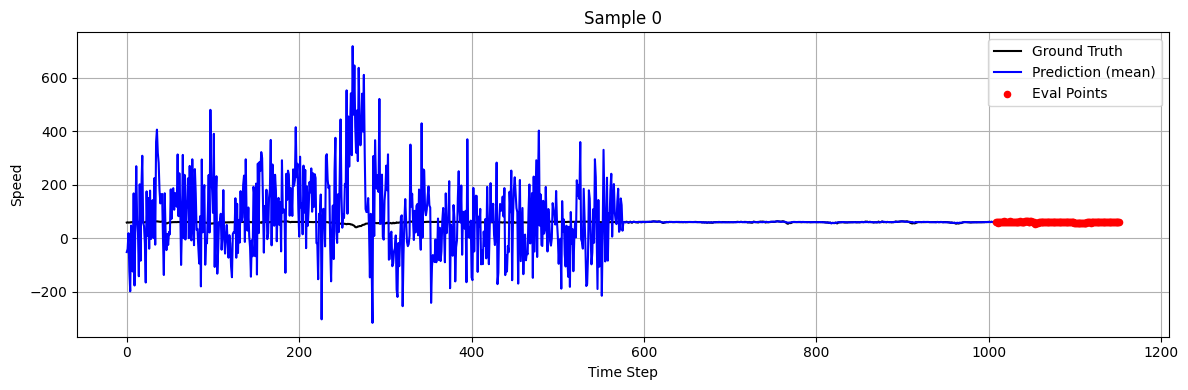


🧪 Sample 1
   ▸ Prediction mean: 67.6612, std: 110.8824
   ▸ Ground Truth min/max: 40.65 / 64.12
   ▸ Eval points: 144.0


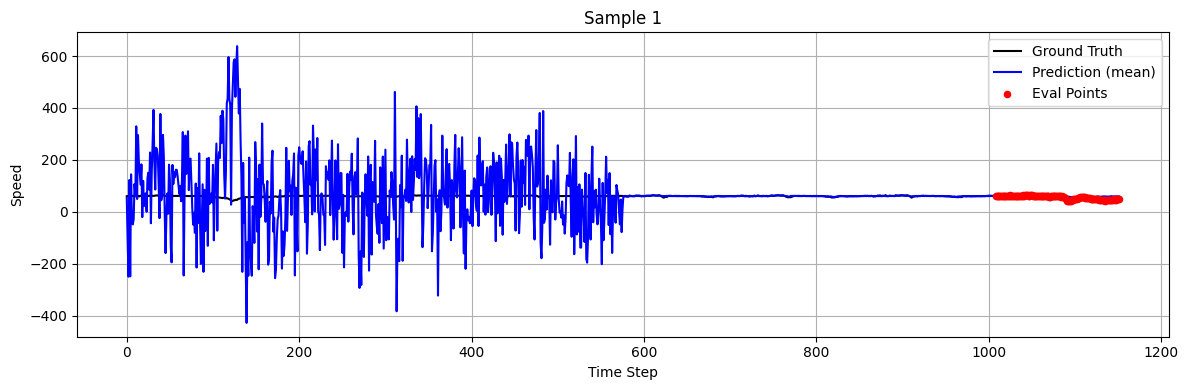


🧪 Sample 2
   ▸ Prediction mean: 59.4101, std: 106.5508
   ▸ Ground Truth min/max: 40.65 / 64.12
   ▸ Eval points: 144.0


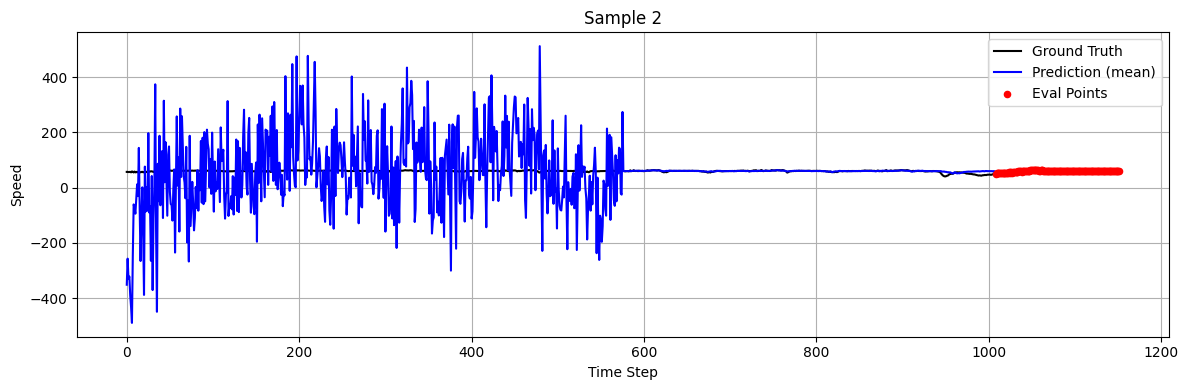

In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# ✅ 加载 .pk 文件
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    (
        all_generated_samples,  # shape: (N, nsample, T, K)
        all_target,             # shape: (N, T, K)
        all_evalpoint,          # shape: (N, T, K)
        all_observed_time,      # shape: (N, T)
        scaler,
        mean_scaler
    ) = pickle.load(f)

# ✅ 提取 speed 的缩放因子
# ✅ tensor/array 转 numpy（要提前定义）
def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)

# ✅ 如果 scaler 是单值或 shape 为 (1,)
scale_array = to_numpy(scaler[0]) if isinstance(scaler, (list, np.ndarray)) else to_numpy(scaler)
mean_array = to_numpy(mean_scaler[0]) if isinstance(mean_scaler, (list, np.ndarray)) else to_numpy(mean_scaler)

# ✅ 提取纯数值
scale = scale_array.item() if scale_array.size == 1 else scale_array
mean = mean_array.item() if mean_array.size == 1 else mean_array
print("scale =", scale, "| type =", type(scale))
print("mean  =", mean,  "| type =", type(mean))

# ✅ tensor/array 转 numpy
def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)

# ✅ 画单个样本（不含 observed points）
def plot_sample_no_obs(idx=0, feature_idx=0):
    pred_samples = to_numpy(all_generated_samples[idx])  # (nsample, T, K)
    target = to_numpy(all_target[idx])[:, feature_idx]   # (T,)
    eval_mask = to_numpy(all_evalpoint[idx])[:, feature_idx]  # (T,)

    # 反标准化
        # 反标准化（只针对 feature_idx=0 的 speed）
    pred_mean = pred_samples.mean(axis=0)[:, feature_idx] * scale[feature_idx] + mean[feature_idx]
    target = target * scale[feature_idx] + mean[feature_idx]

    # pred_mean = pred_samples.mean(axis=0)[:, feature_idx] * scale + mean
    # target = target * scale + mean

    # 打印信息
    print(f"\n🧪 Sample {idx}")
    print(f"   ▸ Prediction mean: {pred_mean.mean():.4f}, std: {pred_mean.std():.4f}")
    print(f"   ▸ Ground Truth min/max: {target.min():.2f} / {target.max():.2f}")
    print(f"   ▸ Eval points: {eval_mask.sum()}")

    # 画图
    plt.figure(figsize=(12, 4))
    plt.plot(target, label="Ground Truth", color="black")
    plt.plot(pred_mean, label="Prediction (mean)", color="blue")
    plt.scatter(np.where(eval_mask == 1)[0], target[eval_mask == 1], color="red", label="Eval Points", s=20, zorder=3)
    plt.title(f"Sample {idx}")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ✅ 示例：画前 3 个样本
for i in range(3):
    plot_sample_no_obs(idx=i)


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# ✅ 加载 .pk 文件
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    (
        all_generated_samples,  # shape: (N, nsample, T, K)
        all_target,             # shape: (N, T, K)
        all_evalpoint,          # shape: (N, T, K)
        all_observed_time,      # shape: (N, T)
        scaler,
        mean_scaler
    ) = pickle.load(f)

# ✅ 提取 speed 的缩放因子
# ✅ tensor/array 转 numpy（要提前定义）
def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)

# ✅ 如果 scaler 是单值或 shape 为 (1,)
scale_array = to_numpy(scaler[0]) if isinstance(scaler, (list, np.ndarray)) else to_numpy(scaler)
mean_array = to_numpy(mean_scaler[0]) if isinstance(mean_scaler, (list, np.ndarray)) else to_numpy(mean_scaler)

# ✅ 提取纯数值
scale = scale_array.item() if scale_array.size == 1 else scale_array
mean = mean_array.item() if mean_array.size == 1 else mean_array
print("scale =", scale, "| type =", type(scale))
print("mean  =", mean,  "| type =", type(mean))

# ✅ tensor/array 转 numpy
def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)


scale = [2.5082731e+00 6.0449700e+00 7.3643786e-01 4.9927516e+00 3.8025341e+00
 3.5711840e-02 1.1828517e-01 1.0000000e-06 1.0000000e-06 1.8451782e+01
 3.0608973e-01 3.7314355e-01 1.4171839e+00 9.1596962e+01 1.0000000e-06
 2.7464828e-01 6.5891254e-01 1.1238422e+00 1.8501008e+00 2.8310790e+00
 2.9968762e-01 2.9533833e-01 9.0907455e+01 1.6041207e+00 2.9262707e+00] | type = <class 'numpy.ndarray'>
mean  = [5.9703671e+01 1.3456448e+01 3.6443621e-01 1.1348142e+01 4.9590387e+00
 8.0777699e-01 4.1956373e-02 0.0000000e+00 0.0000000e+00 6.7961563e+01
 8.5204907e-02 5.0312478e-02 1.8010423e+00 1.7785622e+02 2.0000000e+03
 5.1748145e-02 1.5825382e-01 3.1859156e-01 6.7397720e-01 1.4245195e+00
 9.9768519e-02 9.6550129e-02 1.8259805e+02 1.7977338e+00 4.2063527e+00] | type = <class 'numpy.ndarray'>


In [2]:
def plot_masked_prediction_only(idx=0, feature_idx=0):
    pred_samples = to_numpy(all_generated_samples[idx])     # (nsample, T, K)
    target = to_numpy(all_target[idx])[:, feature_idx]       # (T,)
    eval_mask = to_numpy(all_evalpoint[idx])[:, feature_idx] # (T,)

    # 找出真正需要预测的位置（mask 区）
    masked_idx = np.where(eval_mask == 1)[0]

    # 平均 + 反标准化（只对 masked 区）
    pred_mean = pred_samples.mean(axis=0)[:, feature_idx]
    pred_std = pred_samples.std(axis=0)[:, feature_idx]
    pred_mean = pred_mean[masked_idx] * scale[feature_idx] + mean[feature_idx]
    target_masked = target[masked_idx] * scale[feature_idx] + mean[feature_idx]

    # 打印信息
    print(f"\n🧪 Sample {idx} | Feature {feature_idx}")
    print(f"   ▸ Masked range: {masked_idx.min()} ~ {masked_idx.max()}")
    print(f"   ▸ Prediction mean: {pred_mean.mean():.2f}, std: {pred_mean.std():.2f}")
    print(f"   ▸ Ground truth (masked) mean: {target_masked.mean():.2f}")

    # 画图
    plt.figure(figsize=(10, 4))
    plt.plot(masked_idx, target_masked, label="Ground Truth", color="black")
    plt.plot(masked_idx, pred_mean, label="Prediction (mean)", color="blue")
    plt.fill_between(masked_idx,
                     pred_mean - pred_std[masked_idx] * scale[feature_idx],
                     pred_mean + pred_std[masked_idx] * scale[feature_idx],
                     color="blue", alpha=0.2, label="Prediction ±1σ")
    plt.title(f"Prediction on Masked Region (Sample {idx})")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [3]:
def print_pointwise_stats(idx=0, feature_idx=0):
    pred_samples = to_numpy(all_generated_samples[idx])     # (nsample, T, K)
    target = to_numpy(all_target[idx])[:, feature_idx]       # (T,)
    eval_mask = to_numpy(all_evalpoint[idx])[:, feature_idx] # (T,)

    masked_idx = np.where(eval_mask == 1)[0]
    scale_val = scale[feature_idx]
    mean_val = mean[feature_idx]

    print(f"\n📊 Detailed Stats for Sample {idx} (Masked Speed Region)")

    all_means = []
    all_stds = []

    for t in masked_idx:
        values = pred_samples[:, t, feature_idx] * scale_val + mean_val
        point_mean = values.mean()
        point_std = values.std()
        all_means.append(point_mean)
        all_stds.append(point_std)
        print(f"🕒 t={t:4d} | mean={point_mean:.2f} | std={point_std:.2f}")

    print("\n🔍 Summary across 144 masked points:")
    print(f"▸ Overall mean of predicted values  : {np.mean(all_means):.2f}")
    print(f"▸ Overall std  of predicted values  : {np.mean(all_stds):.2f}")


In [4]:
for i in range(21):
    print_pointwise_stats(idx=i)


📊 Detailed Stats for Sample 0 (Masked Speed Region)
🕒 t=1008 | mean=61.29 | std=0.99
🕒 t=1009 | mean=60.35 | std=1.53
🕒 t=1010 | mean=60.38 | std=1.42
🕒 t=1011 | mean=60.31 | std=1.45
🕒 t=1012 | mean=59.93 | std=1.17
🕒 t=1013 | mean=60.03 | std=1.16
🕒 t=1014 | mean=60.42 | std=1.40
🕒 t=1015 | mean=60.79 | std=1.29
🕒 t=1016 | mean=59.98 | std=1.64
🕒 t=1017 | mean=61.26 | std=1.06
🕒 t=1018 | mean=60.89 | std=1.14
🕒 t=1019 | mean=60.47 | std=1.35
🕒 t=1020 | mean=61.75 | std=1.33
🕒 t=1021 | mean=62.39 | std=1.13
🕒 t=1022 | mean=60.75 | std=1.20
🕒 t=1023 | mean=60.89 | std=1.21
🕒 t=1024 | mean=60.39 | std=1.23
🕒 t=1025 | mean=60.44 | std=1.11
🕒 t=1026 | mean=61.49 | std=1.10
🕒 t=1027 | mean=60.64 | std=0.99
🕒 t=1028 | mean=60.78 | std=0.96
🕒 t=1029 | mean=60.51 | std=0.55
🕒 t=1030 | mean=61.45 | std=0.97
🕒 t=1031 | mean=60.51 | std=1.28
🕒 t=1032 | mean=60.78 | std=1.28
🕒 t=1033 | mean=60.45 | std=1.00
🕒 t=1034 | mean=61.41 | std=0.89
🕒 t=1035 | mean=60.55 | std=0.85
🕒 t=1036 | mean=61.82 |

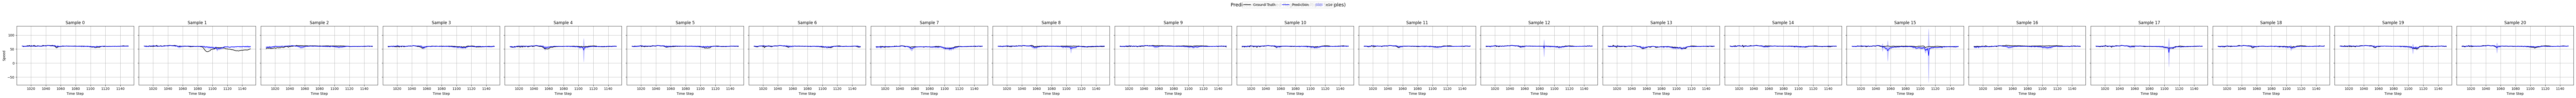

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# ✅ 加载数据
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    all_generated_samples, all_target, all_evalpoint, all_observed_time, scaler, mean_scaler = pickle.load(f)

def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)

# ✅ 提取缩放因子（全是多维 array）
scale = to_numpy(scaler[0]) if isinstance(scaler, (list, np.ndarray)) else to_numpy(scaler)
mean = to_numpy(mean_scaler[0]) if isinstance(mean_scaler, (list, np.ndarray)) else to_numpy(mean_scaler)

# ✅ 多子图可视化函数
def plot_multiple_masked_predictions(samples=4, feature_idx=0):
    fig, axes = plt.subplots(1, samples, figsize=(5 * samples, 4), sharey=True)

    for i in range(samples):
        pred_samples = to_numpy(all_generated_samples[i])     # (nsample, T, K)
        target = to_numpy(all_target[i])[:, feature_idx]       # (T,)
        eval_mask = to_numpy(all_evalpoint[i])[:, feature_idx] # (T,)
        masked_idx = np.where(eval_mask == 1)[0]

        pred_mean = pred_samples.mean(axis=0)[:, feature_idx]
        pred_std = pred_samples.std(axis=0)[:, feature_idx]
        pred_mean = pred_mean[masked_idx] * scale[feature_idx] + mean[feature_idx]
        target_masked = target[masked_idx] * scale[feature_idx] + mean[feature_idx]

        ax = axes[i]
        ax.plot(masked_idx, target_masked, label="Ground Truth", color="black")
        ax.plot(masked_idx, pred_mean, label="Prediction", color="blue")
        ax.fill_between(masked_idx,
                        pred_mean - pred_std[masked_idx] * scale[feature_idx],
                        pred_mean + pred_std[masked_idx] * scale[feature_idx],
                        color="blue", alpha=0.2, label="±1σ")
        ax.set_title(f"Sample {i}")
        ax.set_xlabel("Time Step")
        if i == 0:
            ax.set_ylabel("Speed")
        ax.grid(True)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3)
    fig.suptitle("Prediction on Masked Region (Multiple Samples)", fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()

# ✅ 调用函数
plot_multiple_masked_predictions(samples=21)


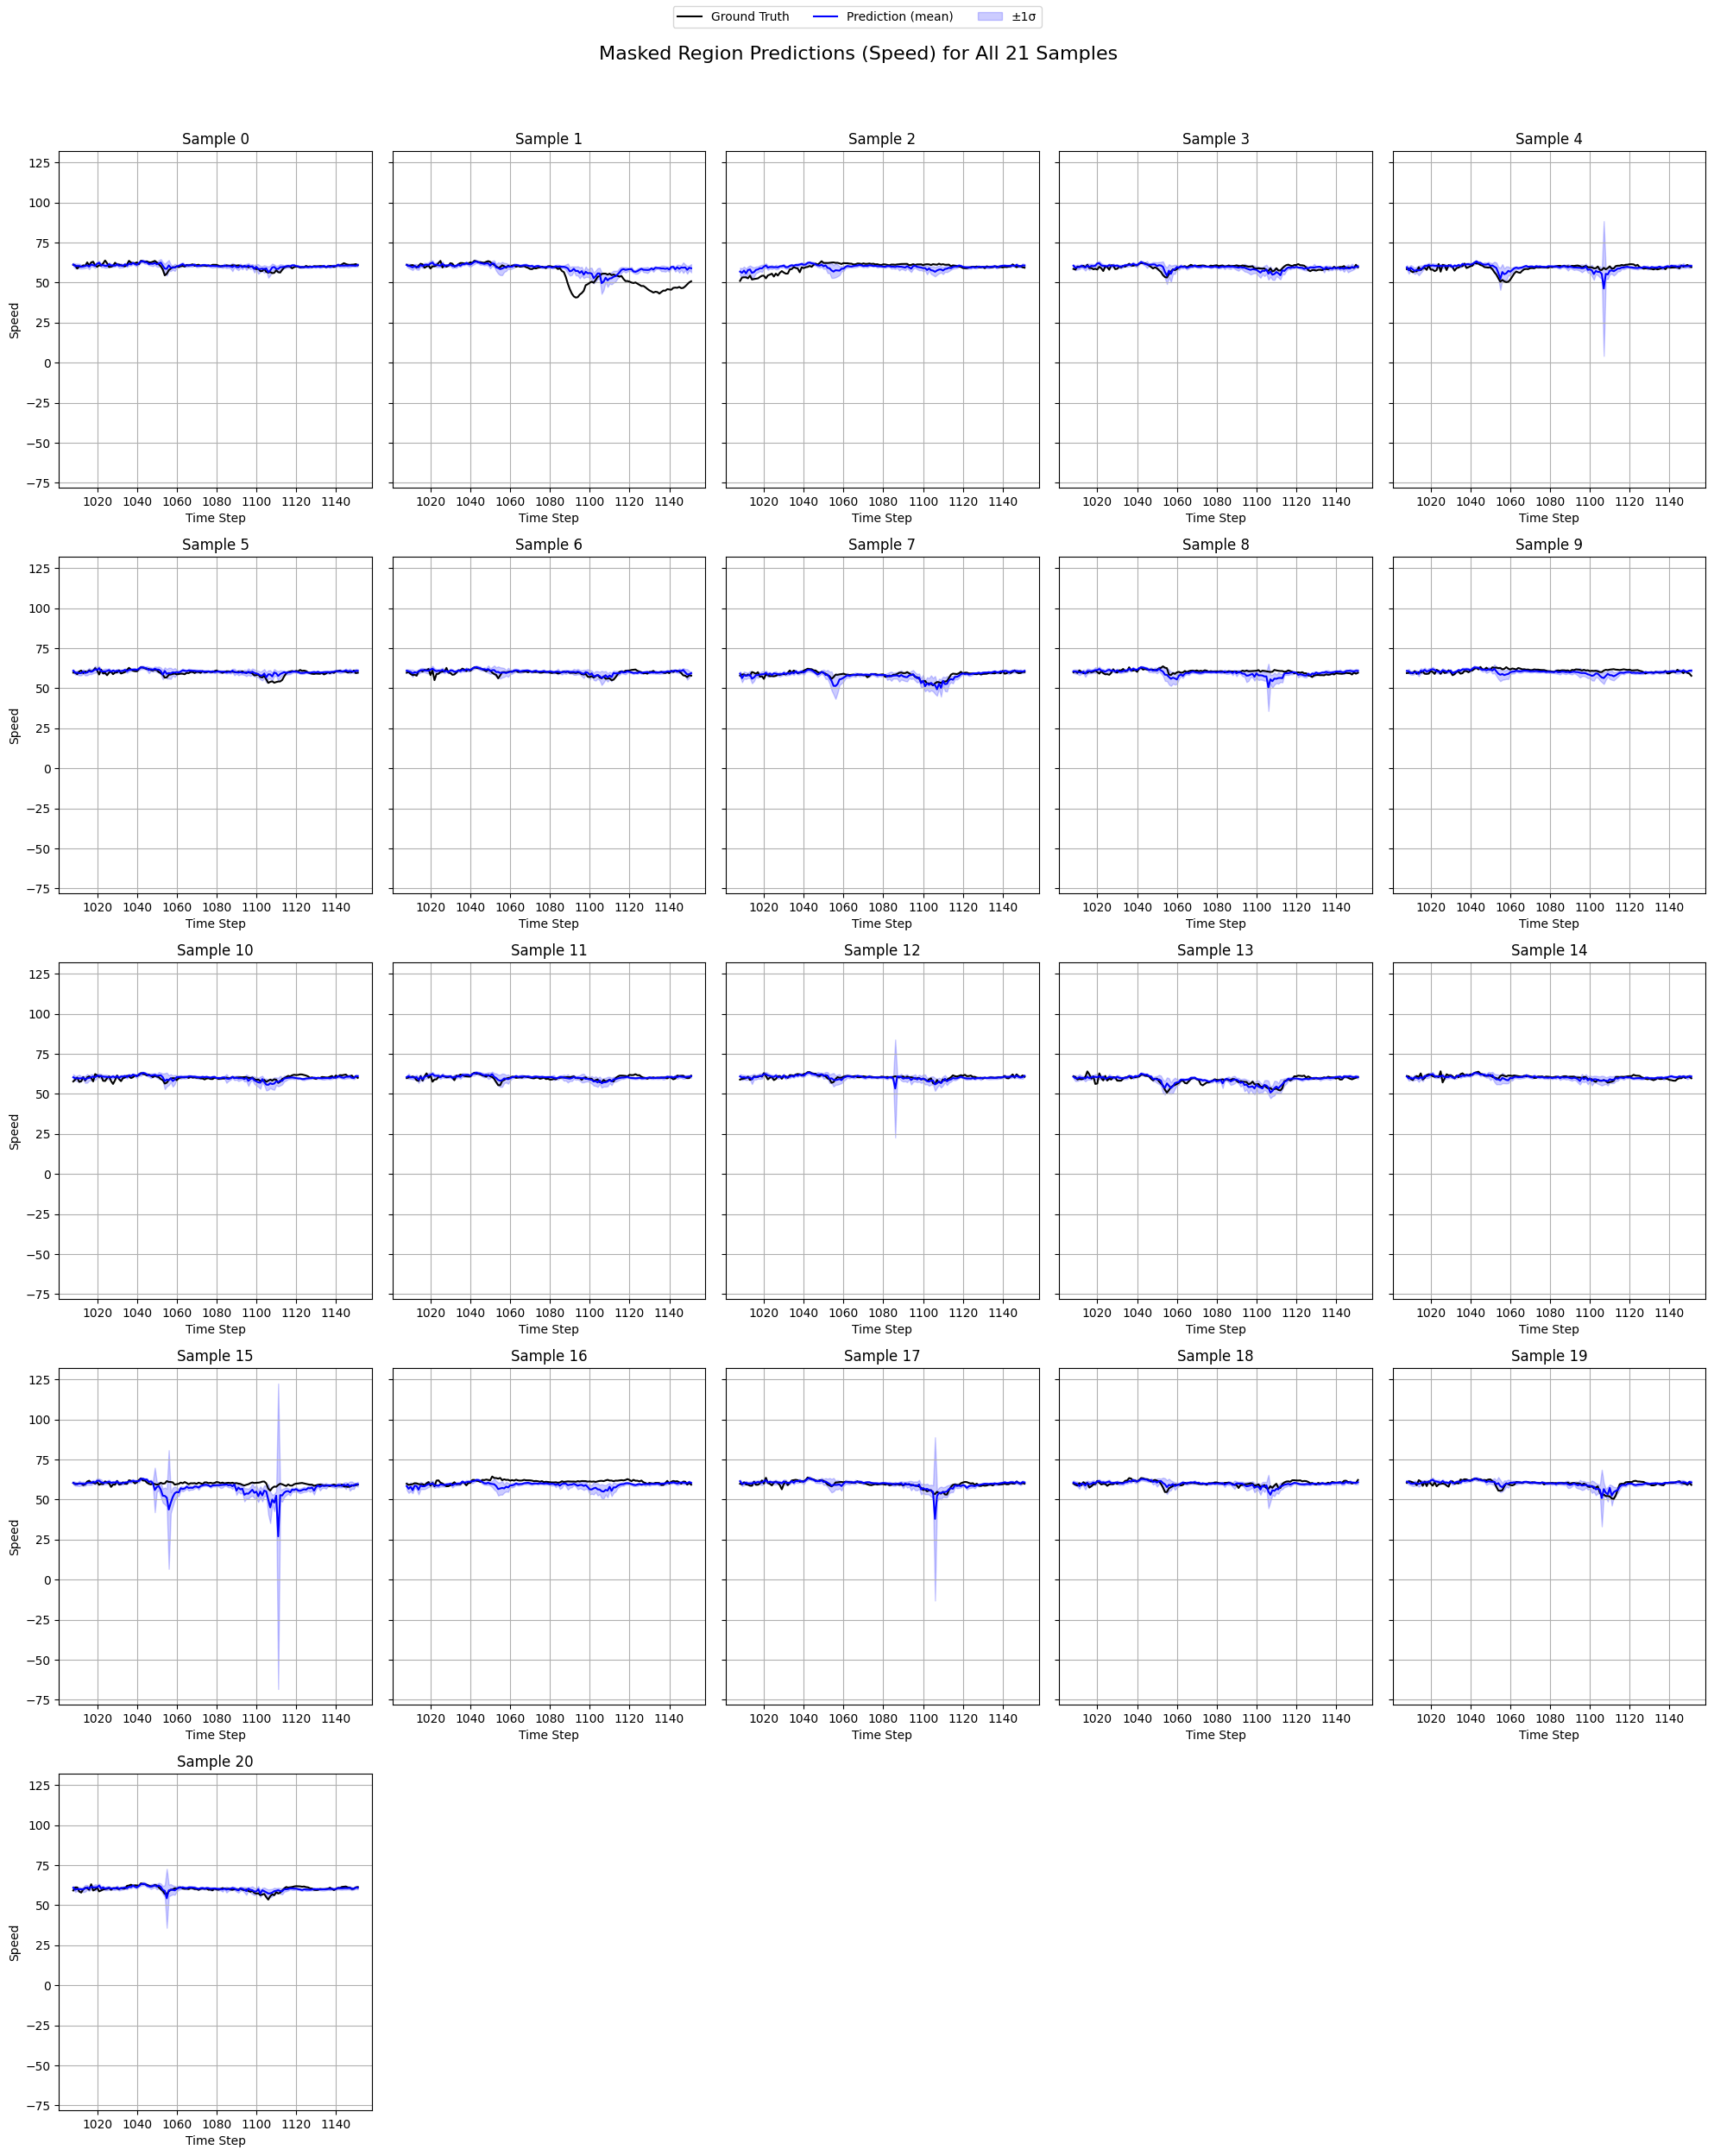

In [30]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# ✅ 加载数据
file_path = "C:/Users/xiaof/Desktop/CSDI/CSDI/save/speed_back_20250311_030733/generated_outputs_nsample20.pk"
with open(file_path, "rb") as f:
    all_generated_samples, all_target, all_evalpoint, all_observed_time, scaler, mean_scaler = pickle.load(f)

def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, "cpu") else np.array(x)

# ✅ 获取缩放因子
scale = to_numpy(scaler[0]) if isinstance(scaler, (list, np.ndarray)) else to_numpy(scaler)
mean = to_numpy(mean_scaler[0]) if isinstance(mean_scaler, (list, np.ndarray)) else to_numpy(mean_scaler)

# ✅ 子图绘制函数
def plot_all_masked_predictions(n_samples=21, feature_idx=0, n_cols=4):
    n_rows = int(np.ceil(n_samples / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 5 * n_rows), sharey=True)
    axes = axes.flatten()

    for i in range(n_samples):
        pred_samples = to_numpy(all_generated_samples[i])
        target = to_numpy(all_target[i])[:, feature_idx]
        eval_mask = to_numpy(all_evalpoint[i])[:, feature_idx]
        masked_idx = np.where(eval_mask == 1)[0]

        pred_mean = pred_samples.mean(axis=0)[:, feature_idx]
        pred_std = pred_samples.std(axis=0)[:, feature_idx]
        pred_mean = pred_mean[masked_idx] * scale[feature_idx] + mean[feature_idx]
        target_masked = target[masked_idx] * scale[feature_idx] + mean[feature_idx]

        ax = axes[i]
        ax.plot(masked_idx, target_masked, label="GT", color="black")
        ax.plot(masked_idx, pred_mean, label="Pred", color="blue")
        ax.fill_between(masked_idx,
                        pred_mean - pred_std[masked_idx] * scale[feature_idx],
                        pred_mean + pred_std[masked_idx] * scale[feature_idx],
                        color="blue", alpha=0.2)
        ax.set_title(f"Sample {i}")
        ax.set_xlabel("Time Step")
        if i % n_cols == 0:
            ax.set_ylabel("Speed")
        ax.grid(True)

    # 删除多余的空子图
    for j in range(n_samples, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Masked Region Predictions (Speed) for All 21 Samples", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    fig.legend(["Ground Truth", "Prediction (mean)", "±1σ"], loc="upper center", ncol=3)
    plt.show()

# ✅ 调用
plot_all_masked_predictions(n_samples=21, feature_idx=0, n_cols=5)



🧪 Sample 0 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.41, std: 1.00
   ▸ Ground truth (masked) mean: 60.32


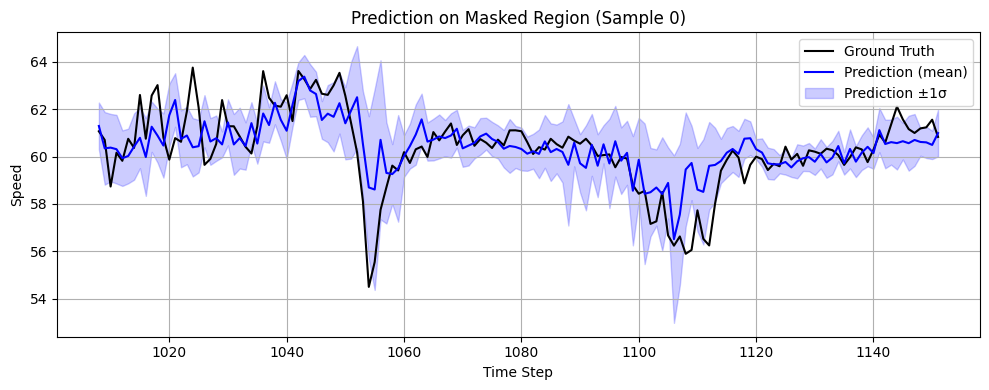


🧪 Sample 1 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.07, std: 2.49
   ▸ Ground truth (masked) mean: 55.27


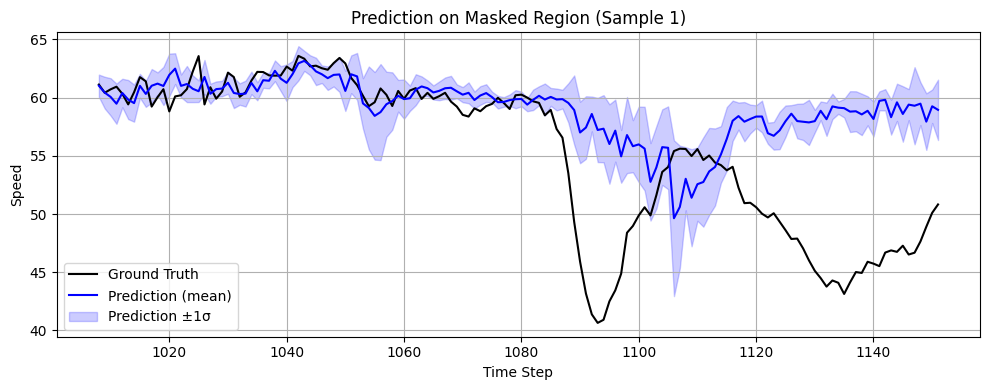


🧪 Sample 2 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.67, std: 1.25
   ▸ Ground truth (masked) mean: 59.61


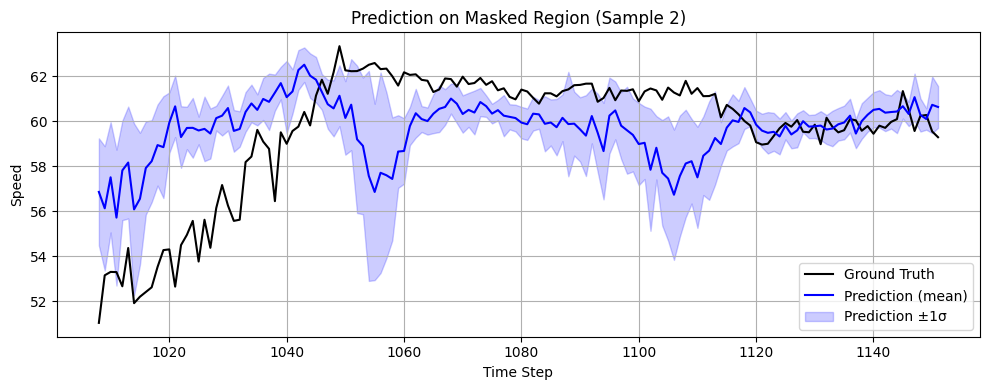


🧪 Sample 3 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.44, std: 1.50
   ▸ Ground truth (masked) mean: 59.46


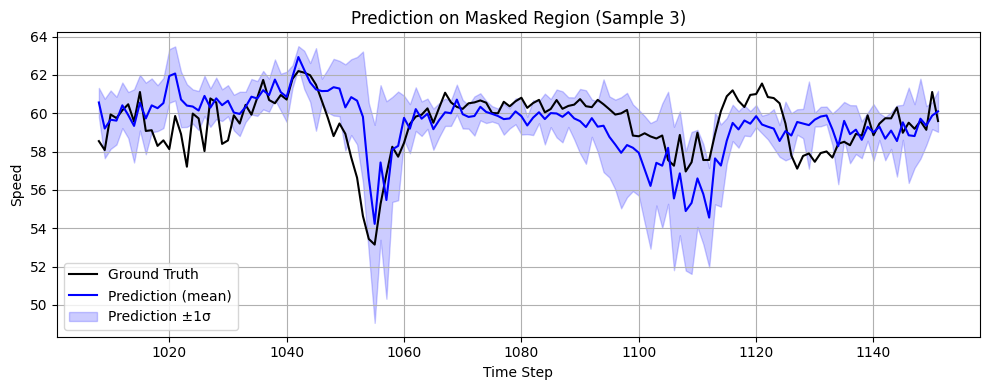


🧪 Sample 4 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.35, std: 1.93
   ▸ Ground truth (masked) mean: 58.95


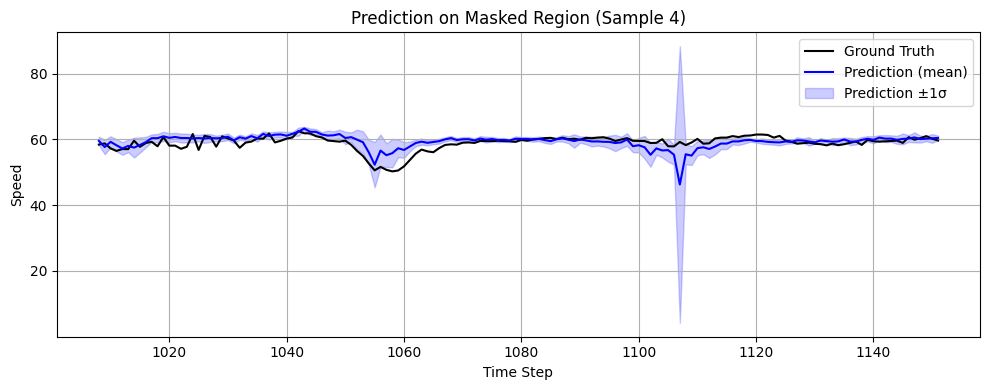


🧪 Sample 5 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.32, std: 0.99
   ▸ Ground truth (masked) mean: 59.63


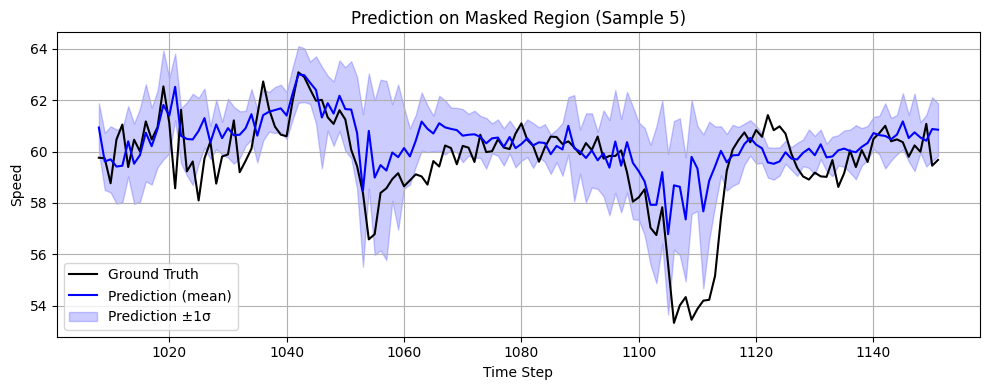


🧪 Sample 6 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.26, std: 1.12
   ▸ Ground truth (masked) mean: 59.70


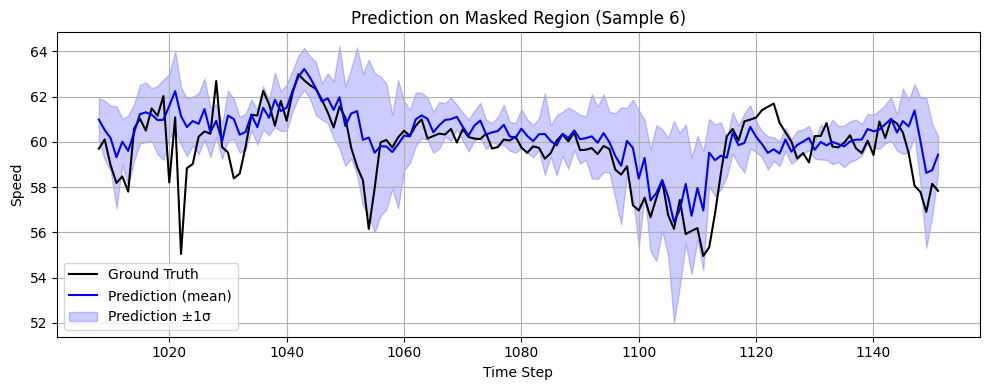


🧪 Sample 7 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 57.96, std: 2.49
   ▸ Ground truth (masked) mean: 58.43


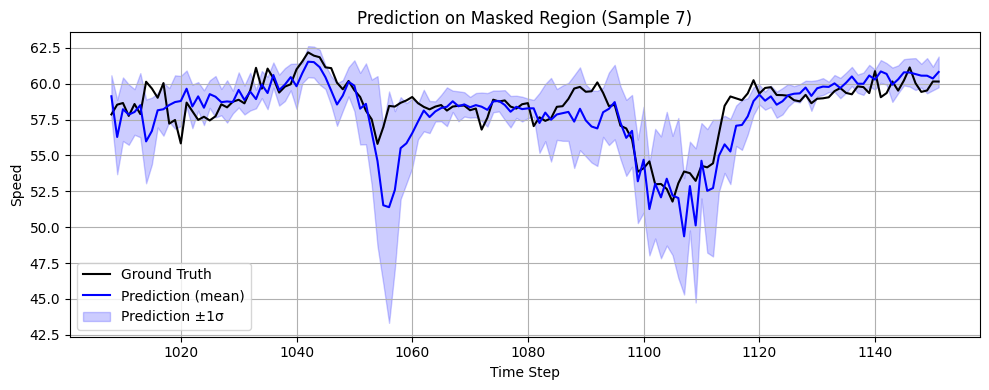


🧪 Sample 8 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.64, std: 1.78
   ▸ Ground truth (masked) mean: 60.26


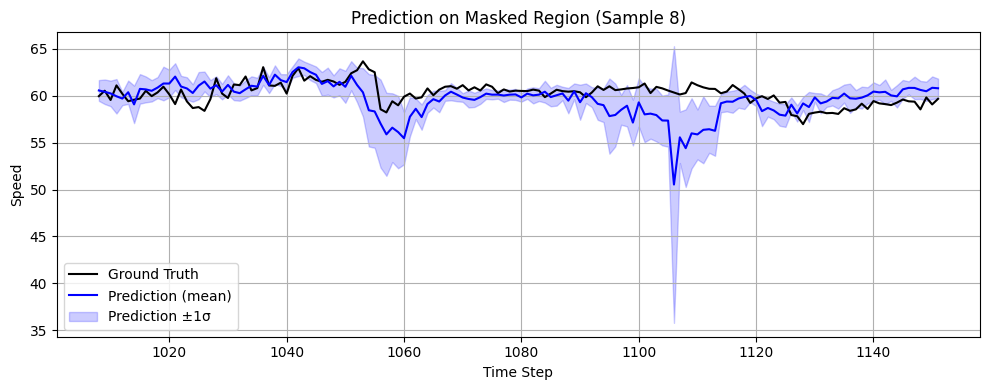


🧪 Sample 9 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.18, std: 1.12
   ▸ Ground truth (masked) mean: 60.87


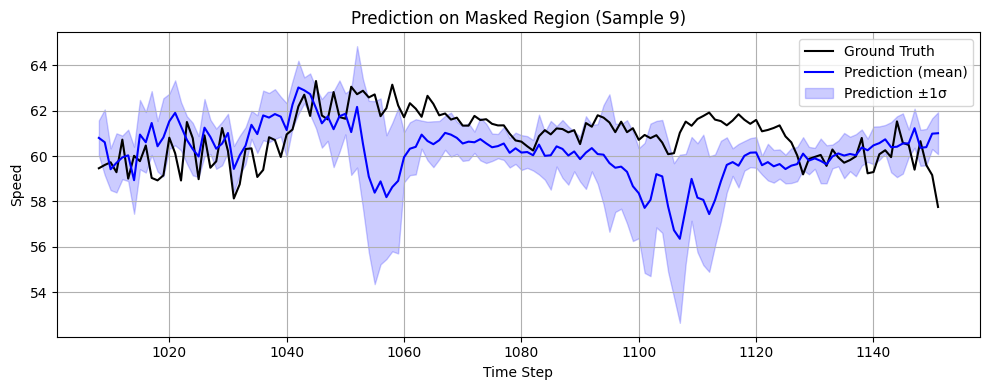


🧪 Sample 10 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.02, std: 1.28
   ▸ Ground truth (masked) mean: 60.04


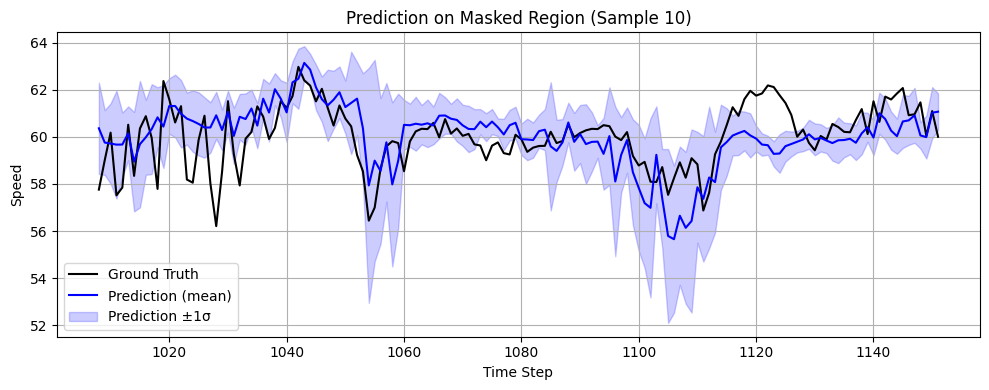


🧪 Sample 11 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.30, std: 1.12
   ▸ Ground truth (masked) mean: 60.14


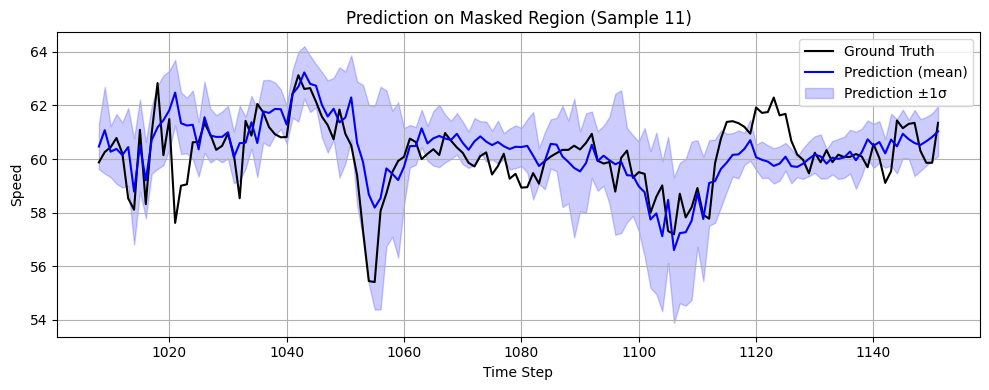


🧪 Sample 12 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.22, std: 1.31
   ▸ Ground truth (masked) mean: 60.44


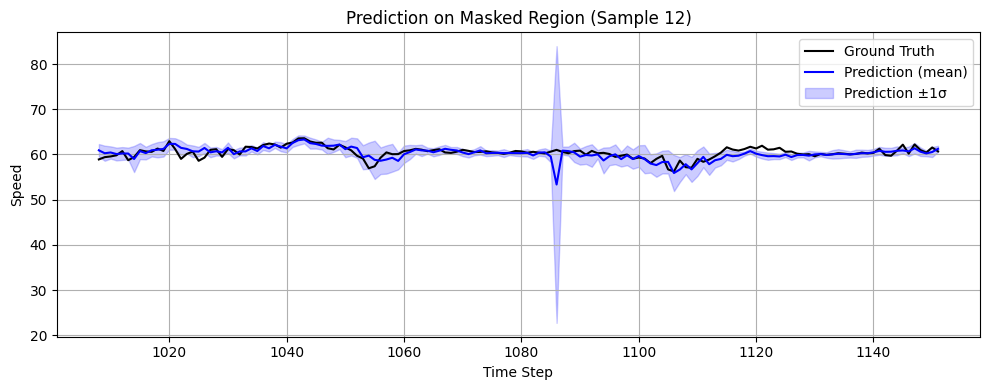


🧪 Sample 13 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 58.68, std: 2.33
   ▸ Ground truth (masked) mean: 58.48


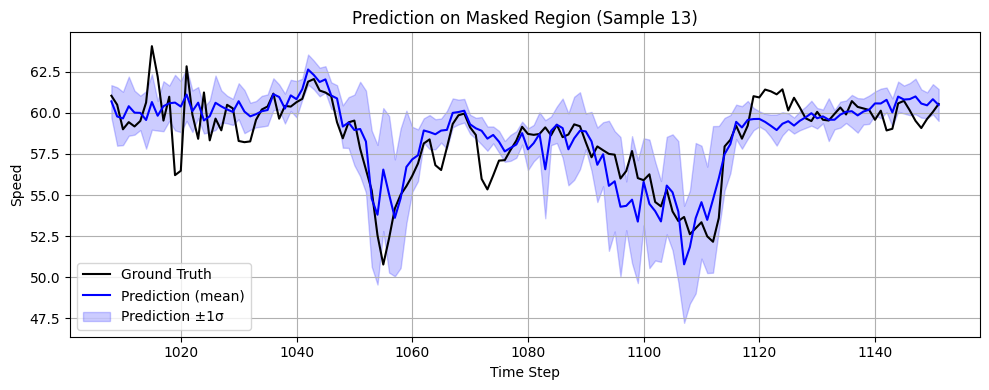


🧪 Sample 14 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.28, std: 0.99
   ▸ Ground truth (masked) mean: 60.46


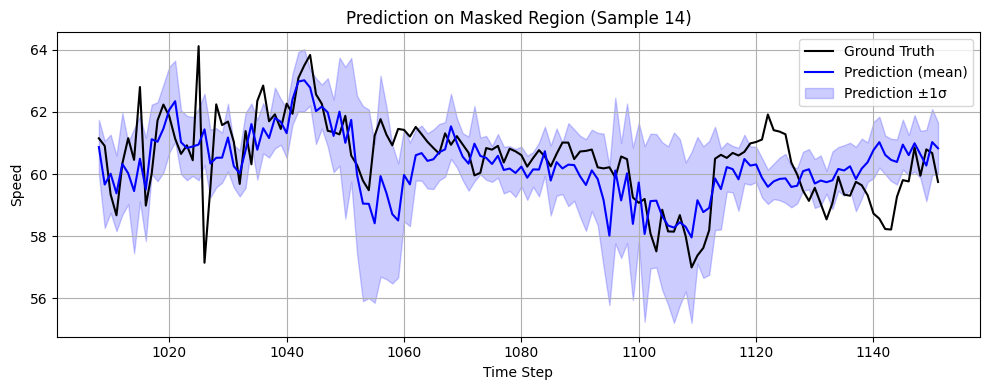


🧪 Sample 15 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 57.39, std: 4.24
   ▸ Ground truth (masked) mean: 59.85


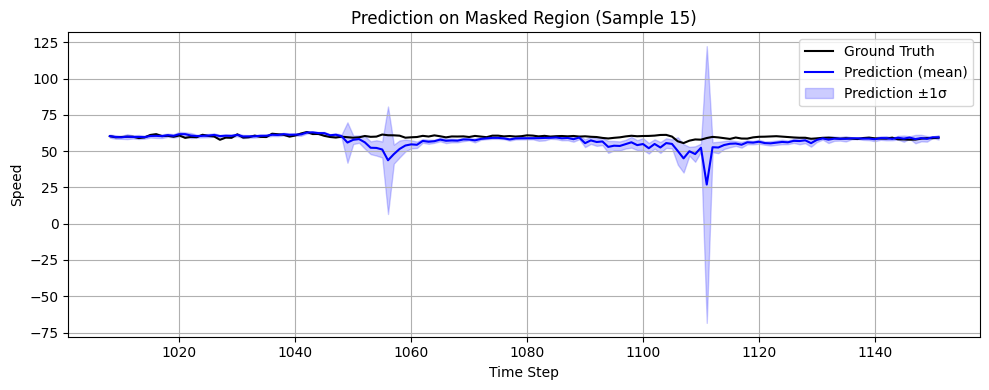


🧪 Sample 16 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.25, std: 1.41
   ▸ Ground truth (masked) mean: 61.08


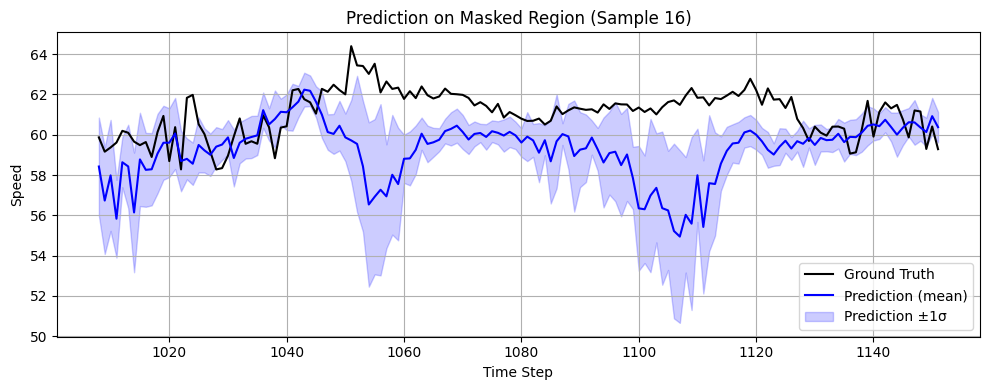


🧪 Sample 17 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.57, std: 2.58
   ▸ Ground truth (masked) mean: 59.53


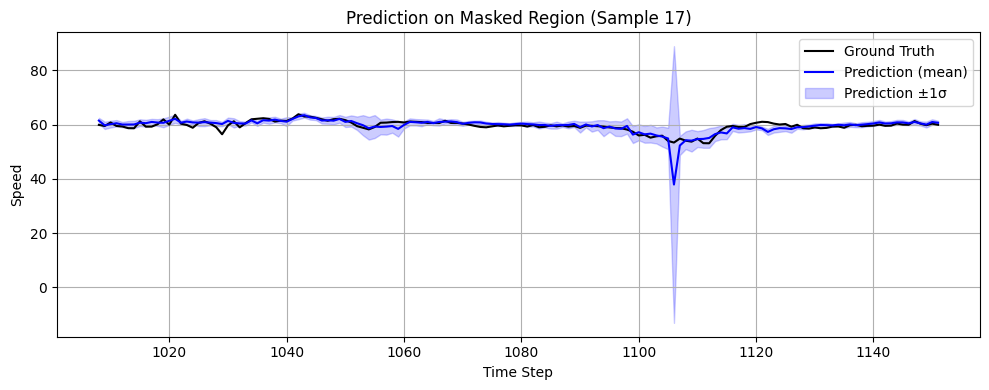


🧪 Sample 18 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.88, std: 1.41
   ▸ Ground truth (masked) mean: 60.08


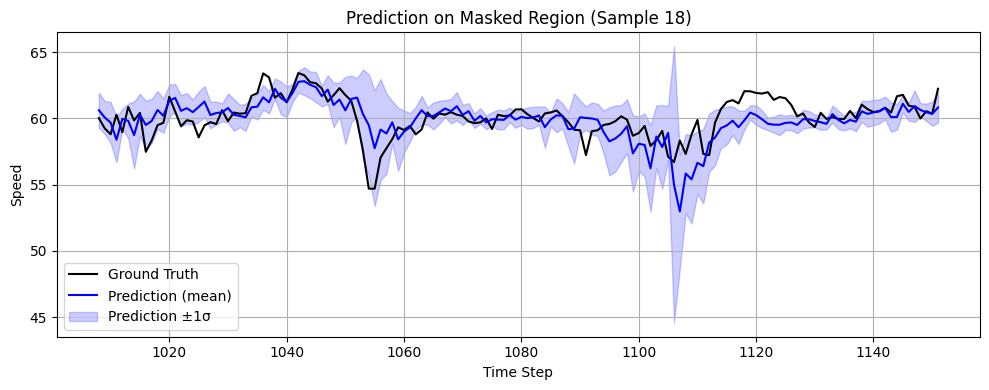


🧪 Sample 19 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.90, std: 1.83
   ▸ Ground truth (masked) mean: 59.69


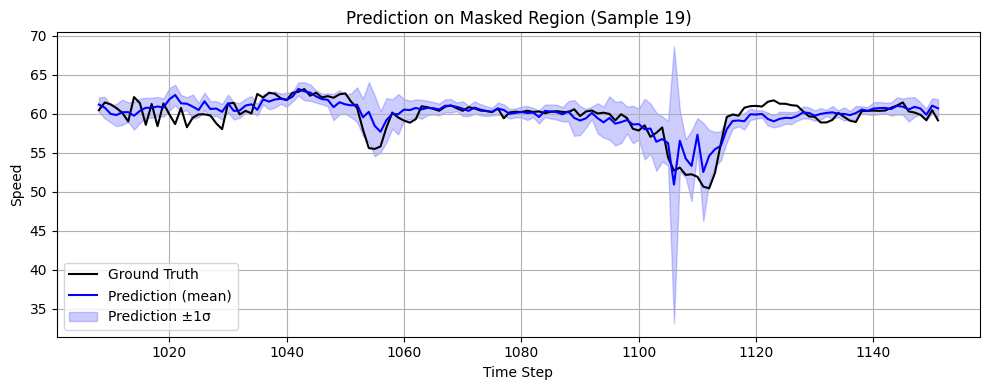


🧪 Sample 20 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.29, std: 1.14
   ▸ Ground truth (masked) mean: 60.12


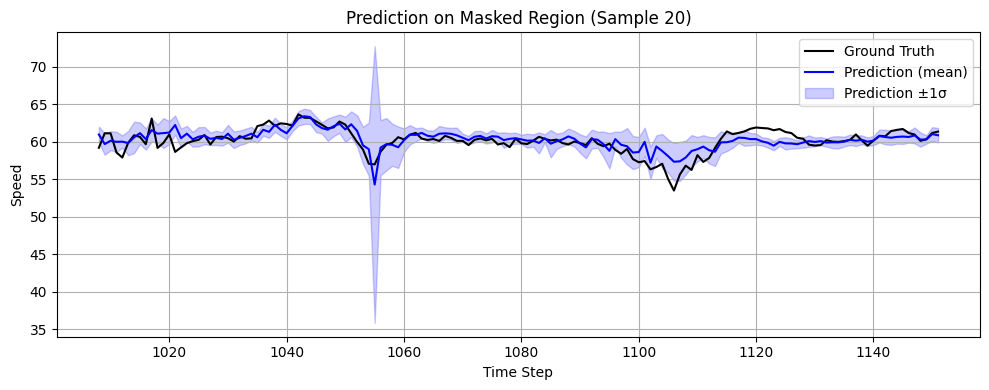

: 

In [ ]:
for i in range(21):
    plot_masked_prediction_only(idx=i)


🧪 Sample 0 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.41, std: 1.00
   ▸ Ground truth (masked) mean: 60.32


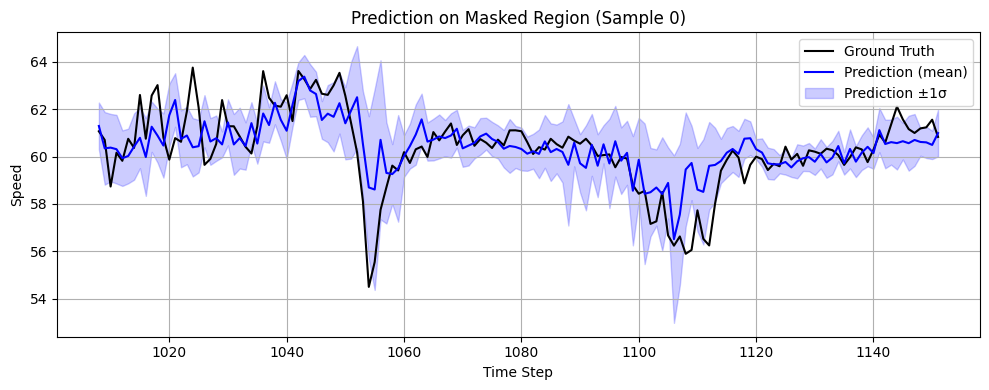


🧪 Sample 1 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.07, std: 2.49
   ▸ Ground truth (masked) mean: 55.27


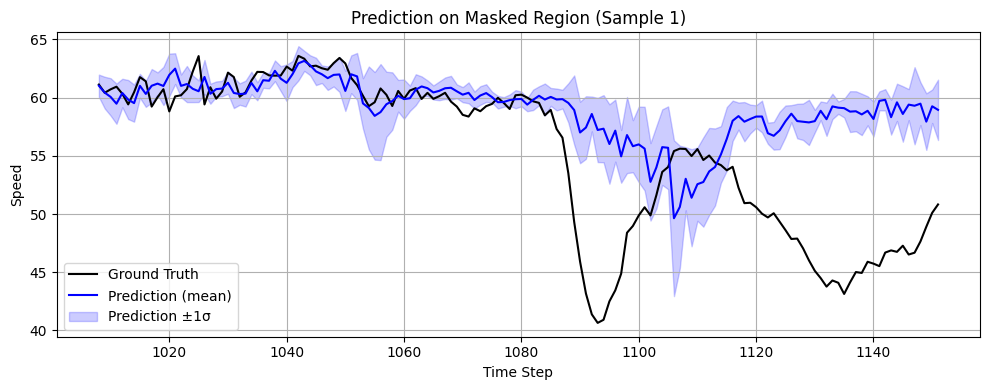


🧪 Sample 2 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.67, std: 1.25
   ▸ Ground truth (masked) mean: 59.61


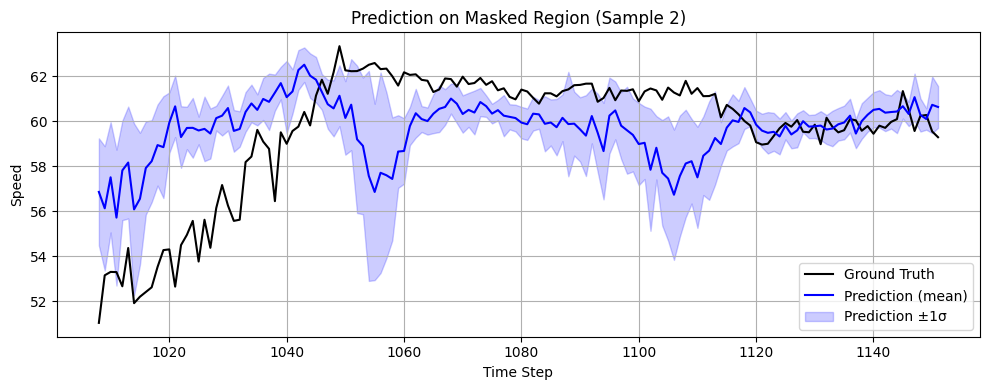


🧪 Sample 3 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.44, std: 1.50
   ▸ Ground truth (masked) mean: 59.46


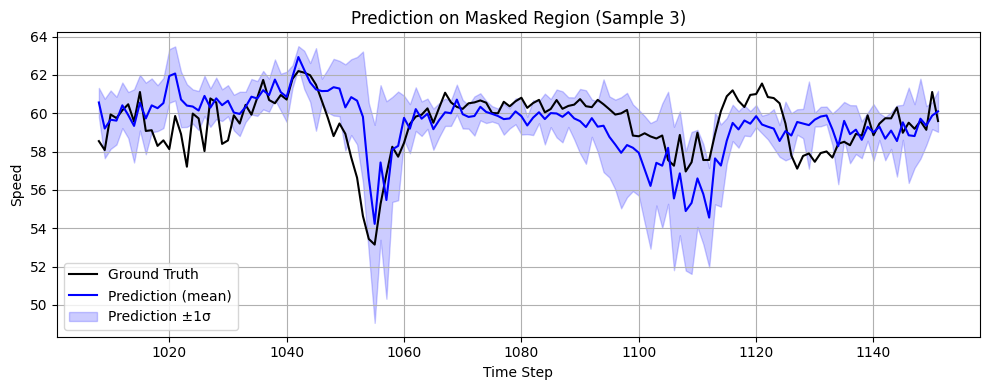


🧪 Sample 4 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.35, std: 1.93
   ▸ Ground truth (masked) mean: 58.95


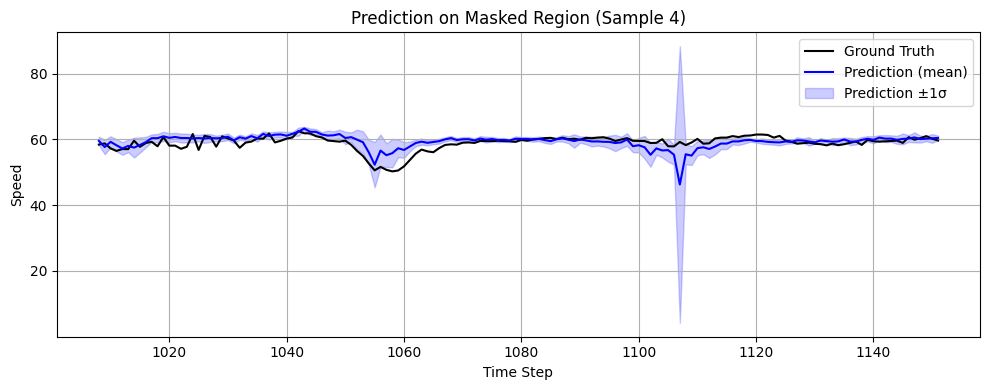


🧪 Sample 5 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.32, std: 0.99
   ▸ Ground truth (masked) mean: 59.63


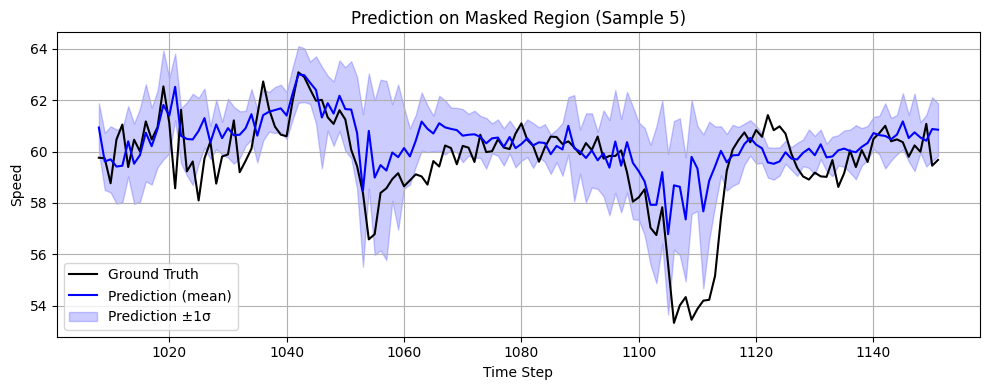


🧪 Sample 6 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.26, std: 1.12
   ▸ Ground truth (masked) mean: 59.70


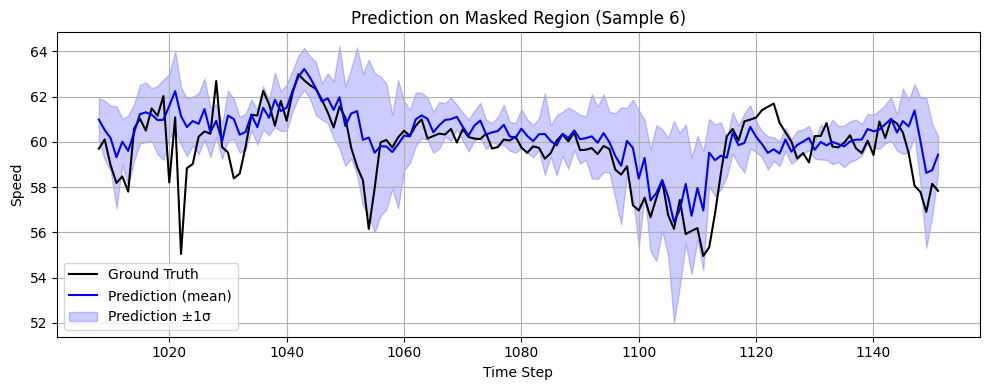


🧪 Sample 7 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 57.96, std: 2.49
   ▸ Ground truth (masked) mean: 58.43


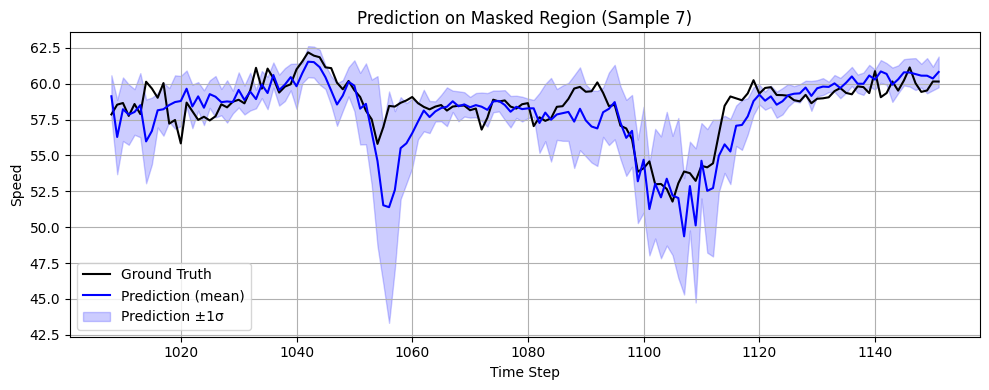


🧪 Sample 8 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.64, std: 1.78
   ▸ Ground truth (masked) mean: 60.26


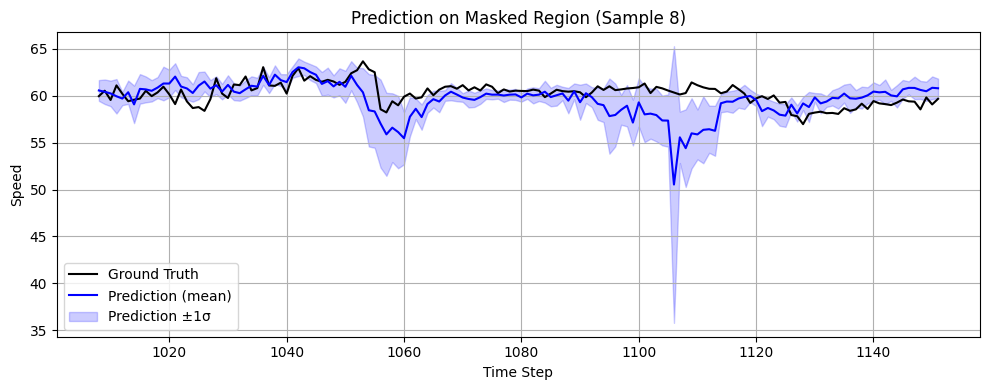


🧪 Sample 9 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.18, std: 1.12
   ▸ Ground truth (masked) mean: 60.87


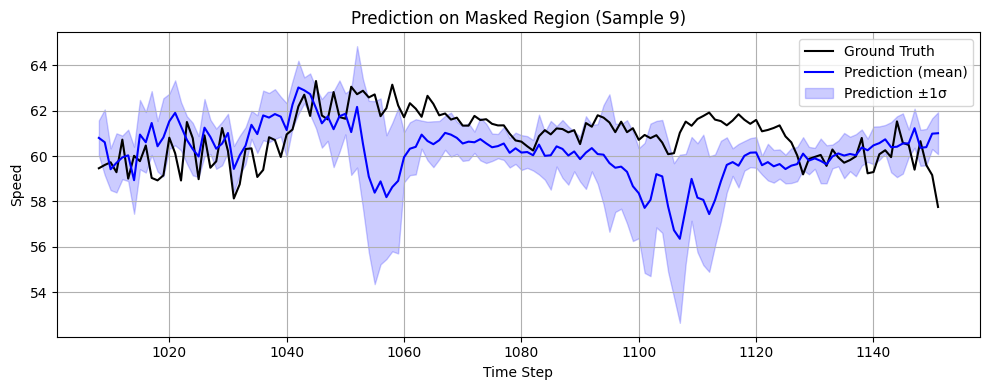


🧪 Sample 10 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.02, std: 1.28
   ▸ Ground truth (masked) mean: 60.04


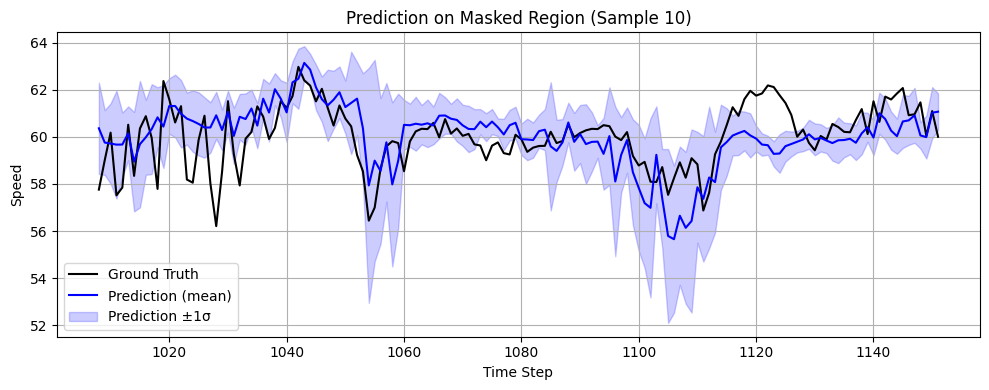


🧪 Sample 11 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.30, std: 1.12
   ▸ Ground truth (masked) mean: 60.14


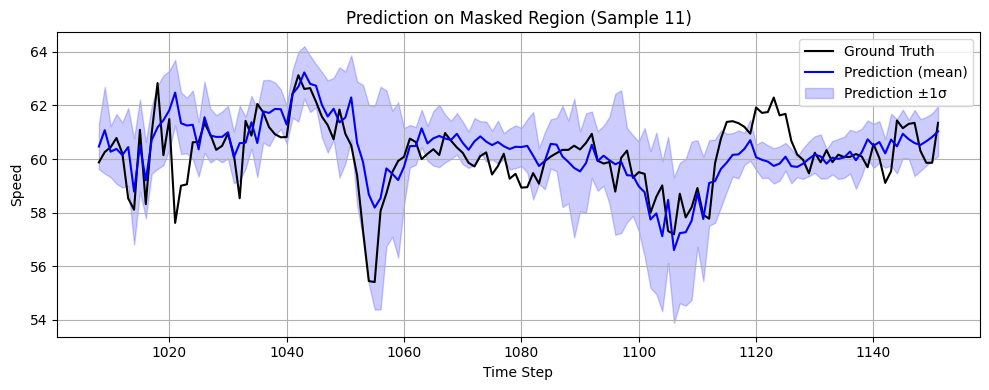


🧪 Sample 12 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.22, std: 1.31
   ▸ Ground truth (masked) mean: 60.44


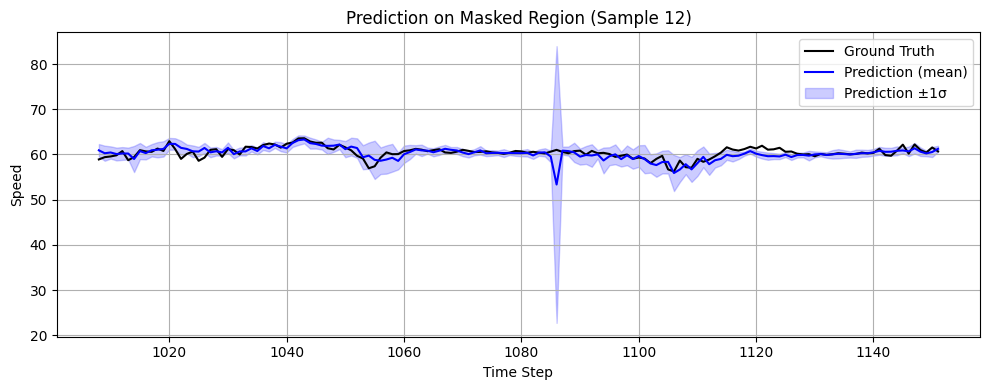


🧪 Sample 13 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 58.68, std: 2.33
   ▸ Ground truth (masked) mean: 58.48


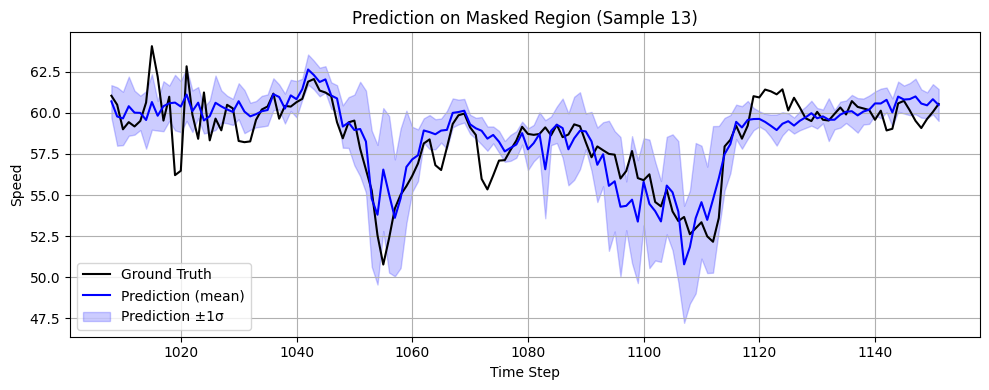


🧪 Sample 14 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.28, std: 0.99
   ▸ Ground truth (masked) mean: 60.46


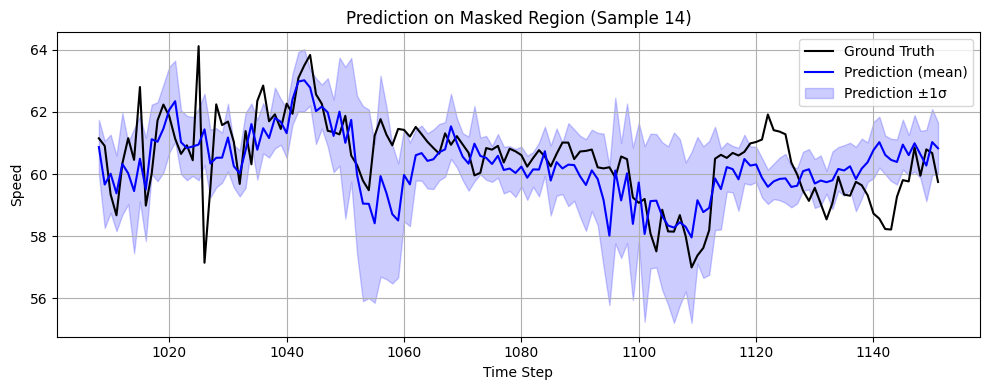


🧪 Sample 15 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 57.39, std: 4.24
   ▸ Ground truth (masked) mean: 59.85


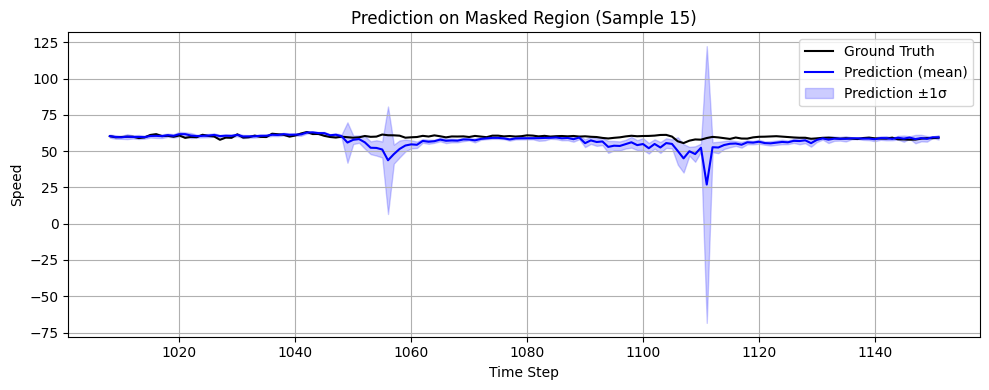


🧪 Sample 16 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.25, std: 1.41
   ▸ Ground truth (masked) mean: 61.08


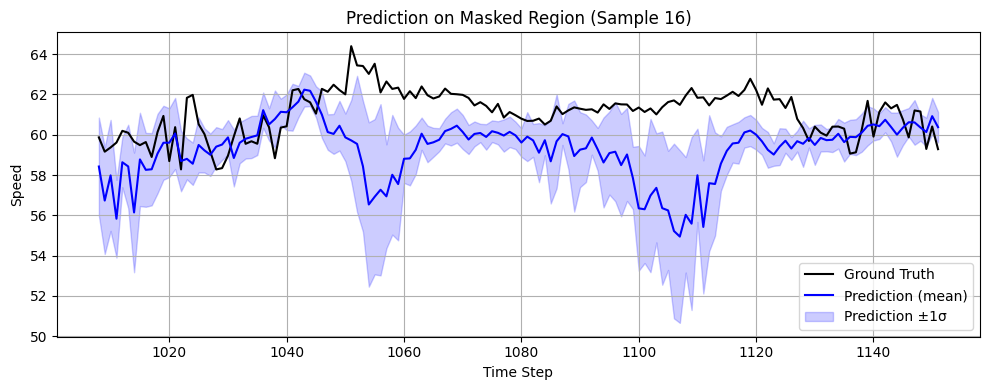


🧪 Sample 17 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.57, std: 2.58
   ▸ Ground truth (masked) mean: 59.53


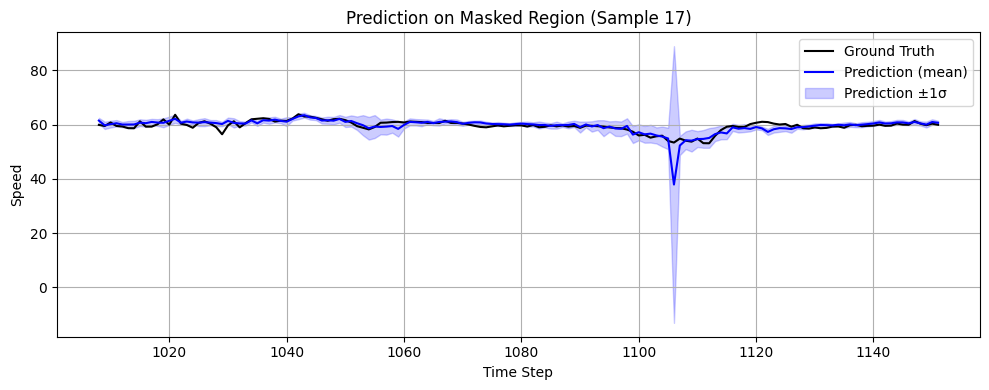


🧪 Sample 18 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.88, std: 1.41
   ▸ Ground truth (masked) mean: 60.08


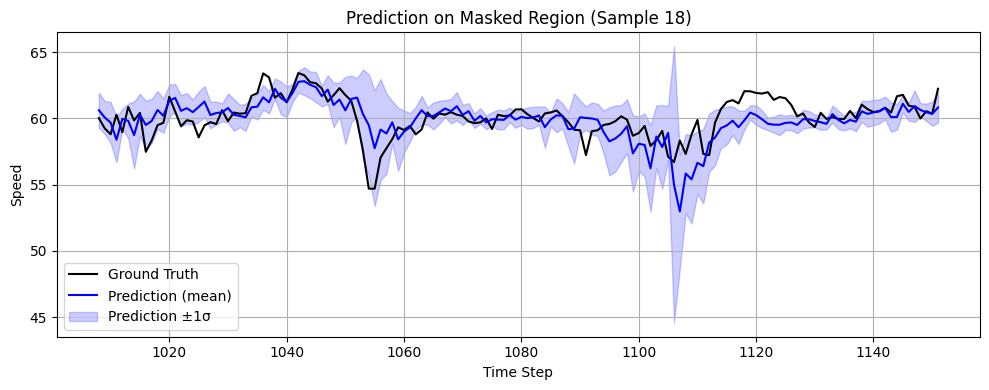


🧪 Sample 19 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 59.90, std: 1.83
   ▸ Ground truth (masked) mean: 59.69


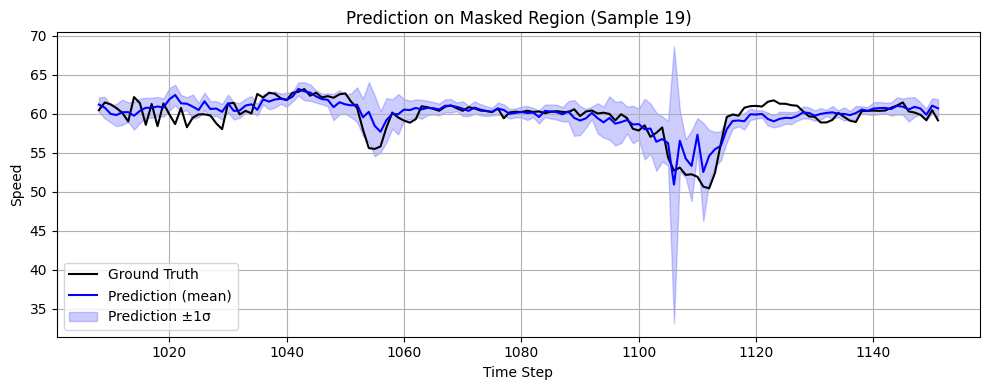


🧪 Sample 20 | Feature 0
   ▸ Masked range: 1008 ~ 1151
   ▸ Prediction mean: 60.29, std: 1.14
   ▸ Ground truth (masked) mean: 60.12


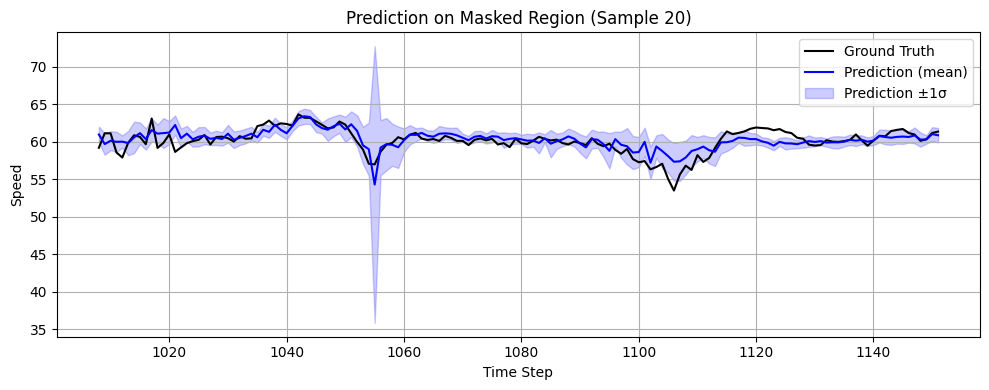

IndexError: index 21 is out of bounds for dimension 0 with size 21

In [27]:
for i in range(22):
    plot_masked_prediction_only(idx=i)

In [21]:
def plot_sample_back_mask(idx=0, feature_idx=0):
    pred_samples = to_numpy(all_generated_samples[idx])  # (nsample, T, K)
    target = to_numpy(all_target[idx])[:, feature_idx]   # (T,)
    eval_mask = to_numpy(all_evalpoint[idx])[:, feature_idx]  # (T,)

    # 反标准化
    pred_mean = pred_samples.mean(axis=0)[:, feature_idx] * scale[feature_idx] + mean[feature_idx]
    target = target * scale[feature_idx] + mean[feature_idx]

    # 找出 masked 区域的索引
    masked_idx = np.where(eval_mask == 1)[0]

    print(f"\n🧪 Sample {idx}")
    print(f"   ▸ Eval range: {masked_idx.min()} ~ {masked_idx.max()}")
    print(f"   ▸ Pred mean stats: {pred_mean[masked_idx].mean():.2f} ± {pred_mean[masked_idx].std():.2f}")

    # 画图
    plt.figure(figsize=(10, 4))
    plt.plot(masked_idx, target[masked_idx], label="Ground Truth", color="black")
    plt.plot(masked_idx, pred_mean[masked_idx], label="Prediction (mean)", color="blue")
    plt.fill_between(
        masked_idx,
        pred_samples[:, masked_idx, feature_idx].min(axis=0) * scale[feature_idx] + mean[feature_idx],
        pred_samples[:, masked_idx, feature_idx].max(axis=0) * scale[feature_idx] + mean[feature_idx],
        color="blue",
        alpha=0.2,
        label="Prediction Range"
    )
    plt.title(f"Masked Region - Sample {idx}")
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🧪 Sample 0
   ▸ Prediction mean: 73.2730, std: 108.9161
   ▸ Ground Truth min/max: 41.06 / 64.12
   ▸ Eval points: 144.0


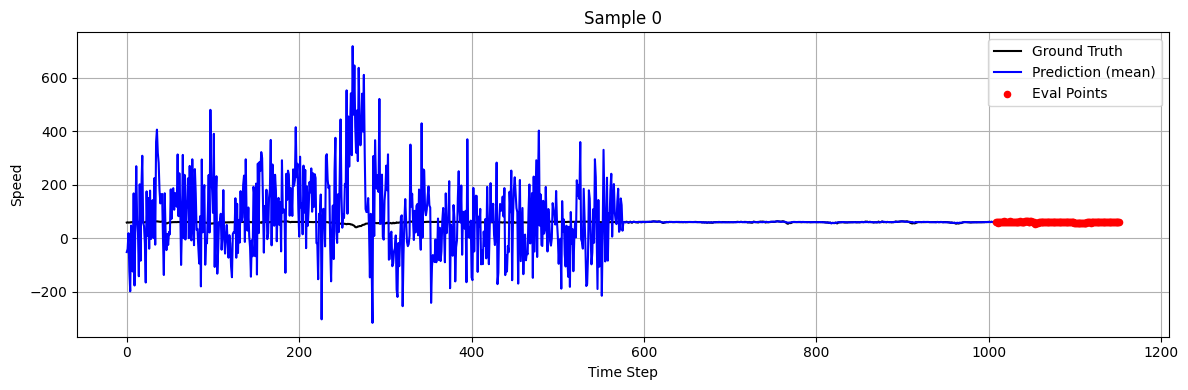


🧪 Sample 1
   ▸ Prediction mean: 67.6612, std: 110.8824
   ▸ Ground Truth min/max: 40.65 / 64.12
   ▸ Eval points: 144.0


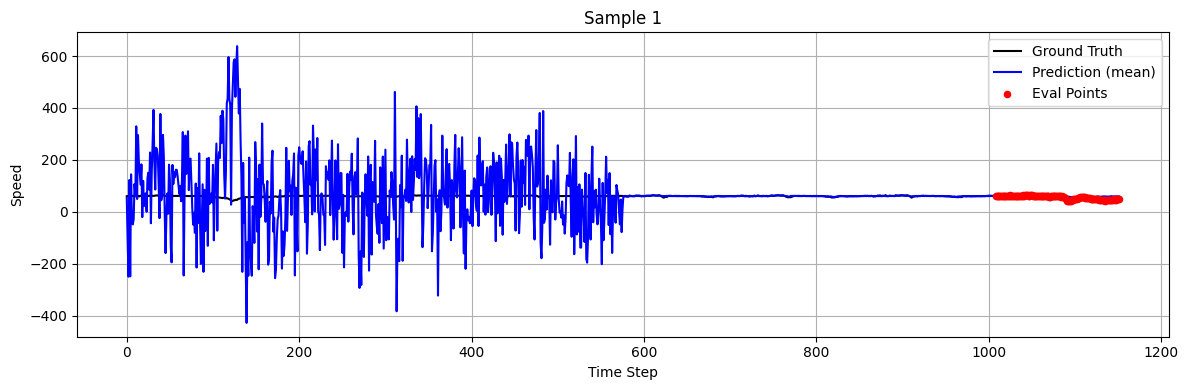


🧪 Sample 2
   ▸ Prediction mean: 59.4101, std: 106.5508
   ▸ Ground Truth min/max: 40.65 / 64.12
   ▸ Eval points: 144.0


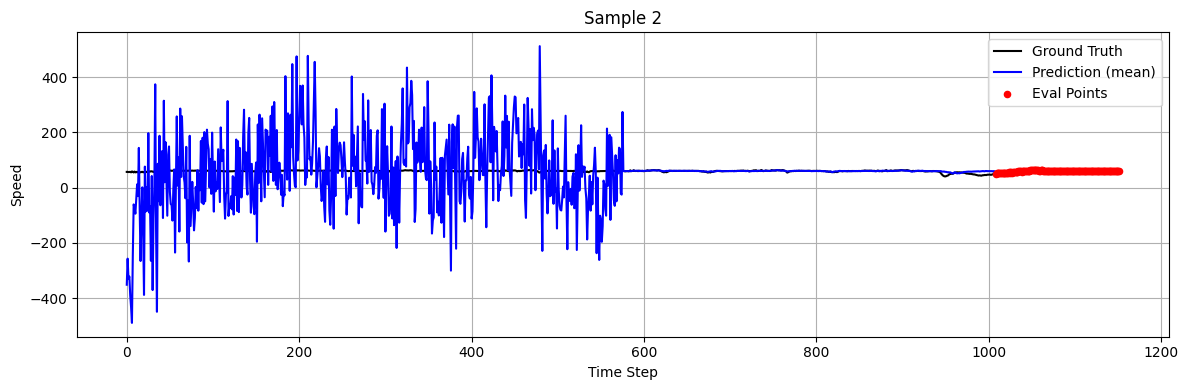

In [22]:
for i in range(3):
    plot_sample_no_obs(idx=i)